In [373]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import beam.calc.electron as ecalc
import scipy.constants as const
from beam.beams import electronbeam
from beam import interactions
plt.style.use('presentation')
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
e = const.physical_constants['elementary charge'][0]
folder = 'E-300_Meeting_July-2019/'
path = '/mnt/md0/Data/rariniello/E-300_Meeting_July-2019/'
%load_ext autoreload
%autoreload 2

green = '#228833'
purple = '#AA3377'
cyan = '#33BBEE'
red = '#CC3311'
yellow = '#CCBB44'
orange = '#EE7733'
blue = '#0077BB'
magenta = '#EE3377'
# Not from the color palette
grey = '#444444'
# Not from the color palette
grey = '#444444'

In [2]:
# Setup the parameters for simulation
Nz = 2000
z = np.linspace(0, 100*2*np.pi, Nz, dtype='double')
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2 # Go from Robert units to normalized units
ne = ne0*np.ones(Nz)
kb = 5.95074e4 * np.sqrt(ne0)/np.sqrt(2*gb0)
betaBeam = 1
alphaBeam = 0
eps = 1.0e-6
delta = 0.02
sigma_r0 = np.sqrt(betaBeam*eps)
electronParams = {
    'name' : 'No_Offset',
    'path' : path,
    'load' : False,
    'N' : 100000,
    'gamma' : 20000,
    'emittance' : gb0*eps,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : delta
}

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return ne
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 10

In [3]:
# Matched offset beam
dumpPer = 1
offset = 1.0
electronParams['offset_y'] = 0
electronParams['offset_xp'] = 0
electronParams['offset_yp'] = 0
electronParams['offset_x'] = offset*sigma_r0
electronParams['name'] = 'x-%0.2fsigmar0_Emittance' % (offset)
beam = electronbeam.OffsetGaussianElectronBeam(electronParams)
interactions.electron_plasma(beam, plasmaDen, z*1e6, dumpPer, 20)
beam_CS = beam.get_CS()
ptcls = beam.load_ptcls(int(Nz/dumpPer)-1)[0]

ptcls = beam.load_ptcls(0)[0]
x = beam.get_x(ptcls)
xp = beam.get_xp(ptcls)
syyp = np.average(x*xp)

z_plot = np.linspace(0, 100*2*np.pi, 10000)
sy2 = sigma_r0**2*(1  + offset**2)
gammaBeam = (1+alphaBeam**2)/betaBeam
syp2 = gammaBeam*eps
DeltaY = offset*sigma_r0
Psimax = z_plot/(np.sqrt(1-delta))
Psimin = z_plot/(np.sqrt(1+delta))
DeltaPsi = (Psimax-Psimin)

eps_sat_0 = (1+0.5*offset**2)
emt = 0.5*np.sqrt((sy2+syp2)**2-np.sinc(DeltaPsi/np.pi)**2*((syp2-sy2)**2+4*syyp**2)-2*np.sinc(DeltaPsi/2/np.pi)**2
                 *((sy2+syp2)*DeltaY**2+np.sinc(DeltaPsi/np.pi)*(syp2-sy2)*DeltaY**2))/eps

In [4]:
# No offset mismatched beam
dumpPer = 1
beta0 = 2.5
electronParams['offset_y'] = 0
electronParams['offset_xp'] = 0
electronParams['offset_yp'] = 0
electronParams['offset_x'] = 0
electronParams['betax'] = beta0
electronParams['name'] = 'Mismatched_Emittance'
beam1 = electronbeam.OffsetGaussianElectronBeam(electronParams)
interactions.electron_plasma(beam1, plasmaDen, z*1e6, dumpPer, 20)
beam_CS1 = beam1.get_CS()
ptcls = beam1.load_ptcls(int(Nz/dumpPer)-1)[0]

z_plot = np.linspace(0, 100*2*np.pi, 10000)
Psimax = z_plot/(np.sqrt(1-delta))
Psimin = z_plot/(np.sqrt(1+delta))
DeltaPsi = (Psimax-Psimin)

eps_sat = 0.5*(1/beta0+beta0)
emt_mis = eps_sat*np.sqrt(1-(4*eps_sat**2-4)/(4*eps_sat**2)*np.sinc(DeltaPsi/np.pi)**2)

In [5]:
# Matched offset beam
dumpPer = 1
offset = 1.0
electronParams['offset_y'] = 0
electronParams['offset_xp'] = 0
electronParams['offset_yp'] = 0
electronParams['offset_x'] = offset*sigma_r0
electronParams['name'] = 'Offset_Mismatched'
beam2 = electronbeam.OffsetGaussianElectronBeam(electronParams)
interactions.electron_plasma(beam2, plasmaDen, z*1e6, dumpPer, 20)
beam_CS2 = beam2.get_CS()
ptcls = beam2.load_ptcls(int(Nz/dumpPer)-1)[0]

ptcls = beam2.load_ptcls(0)[0]
x = beam2.get_x(ptcls)
xp = beam2.get_xp(ptcls)
syyp = np.average(x*xp)

z_plot = np.linspace(0, 100*2*np.pi, 10000)
sy2 = sigma_r0**2*offset**2+beta0*eps
gammaBeam = (1+alphaBeam**2)/beta0
syp2 = gammaBeam*eps
DeltaY = offset*sigma_r0
Psimax = z_plot/(np.sqrt(1-delta))
Psimin = z_plot/(np.sqrt(1+delta))
DeltaPsi = (Psimax-Psimin)

eps_sat_2 = eps_sat+0.5*offset**2
emt_both = 0.5*np.sqrt((sy2+syp2)**2-np.sinc(DeltaPsi/np.pi)**2*((syp2-sy2)**2+4*syyp**2)-2*np.sinc(DeltaPsi/2/np.pi)**2
                 *((sy2+syp2)*DeltaY**2+np.sinc(DeltaPsi/np.pi)*(syp2-sy2)*DeltaY**2))/eps

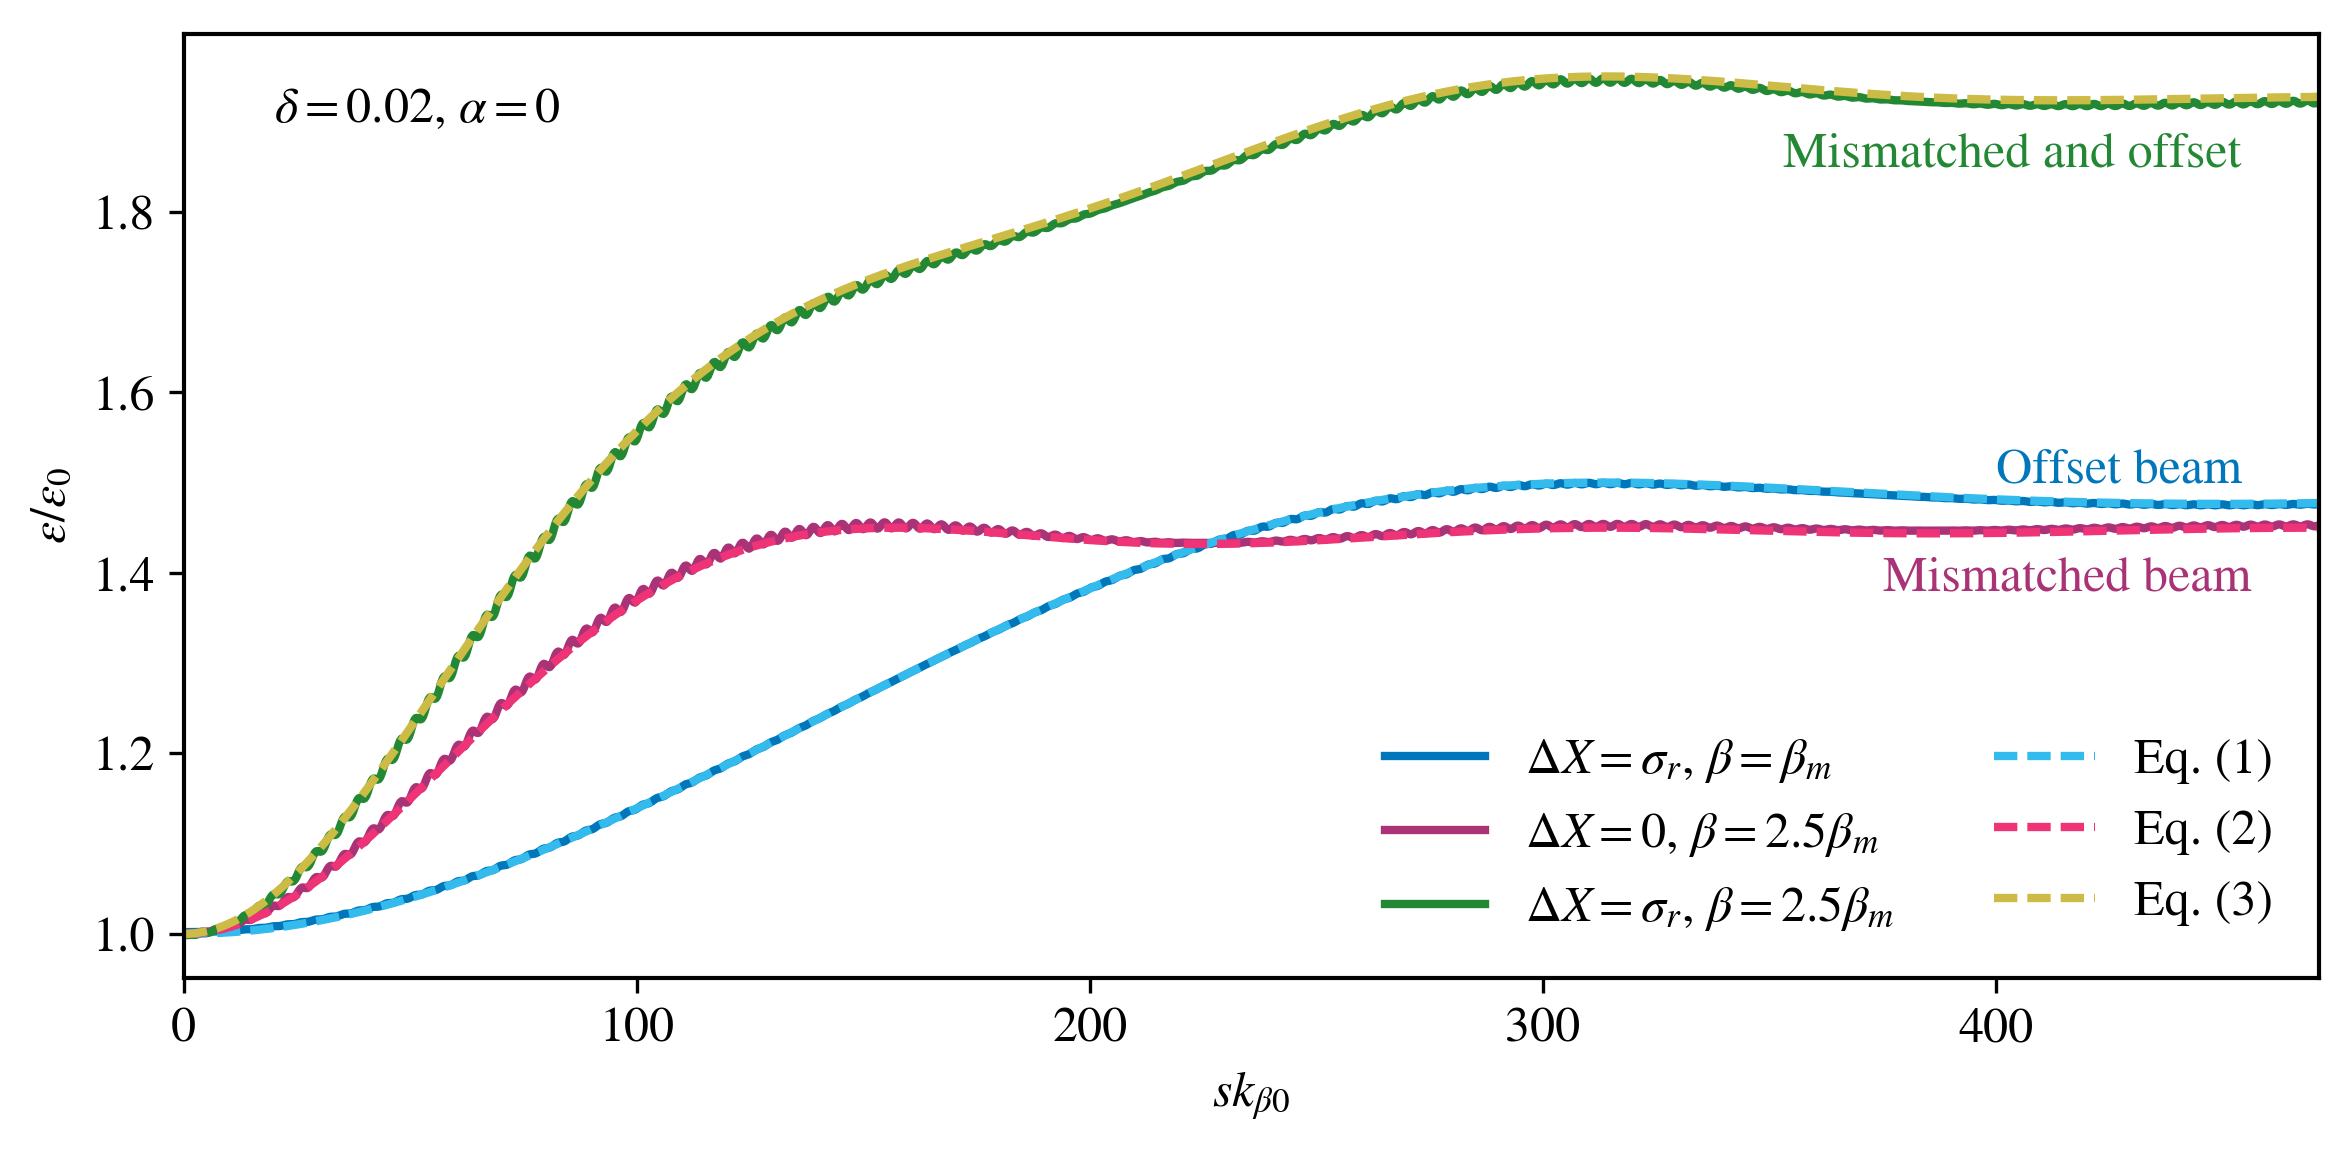

In [6]:
plt.figure(figsize=(8, 4), dpi=300)
plt.plot(beam.z, beam_CS['eps_x']/eps, c=blue, label=r'$\Delta X=\sigma_{r}$, $\beta=\beta_m$')
plt.plot(beam1.z, beam_CS1['eps_x']/eps, c=purple, label=r'$\Delta X=0$, $\beta=2.5\beta_m$')
plt.plot(beam2.z, beam_CS2['eps_x']/eps, c=green, label=r'$\Delta X=\sigma_{r}$, $\beta=2.5\beta_m$')

plt.plot(z_plot, emt, '--', c=cyan, label='Eq. (1)')
plt.plot(z_plot, emt_mis, '--', c=magenta, label='Eq. (2)')
plt.plot(z_plot, emt_both, '--', c=yellow, label='Eq. (3)')

plt.text(20, 1.9, r'$\delta=0.02$, $\alpha=0$')
plt.text(400, 1.5, 'Offset beam', color=blue)
plt.text(375, 1.38, 'Mismatched beam', color=purple)
plt.text(353, 1.85, 'Mismatched and offset', color=green)
plt.legend(frameon=False, loc=4, ncol=2)
plt.xlabel(r'$sk_{\beta0}$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.xlim(0, 75*2*np.pi)
plt.tight_layout()
plt.savefig(folder+'Emittance_Evolution.svg')
plt.show()

In [7]:
import numpy as np
from numpy.fft import fft, ifft, fftfreq, fftshift
from scipy.integrate import simps
from scipy.interpolate import interp1d
from scipy.special import erf
from beam.beams import laserpulse
from beam.beams import laserbeam
from beam.elements import plasma
from beam.elements import optic
from beam import interactions
from propagation import laser
from ionization import ionization
from lens import profile
from lens import bessel
from lens import ray
import matplotlib.pyplot as plt
from lens import design

lam = 0.796

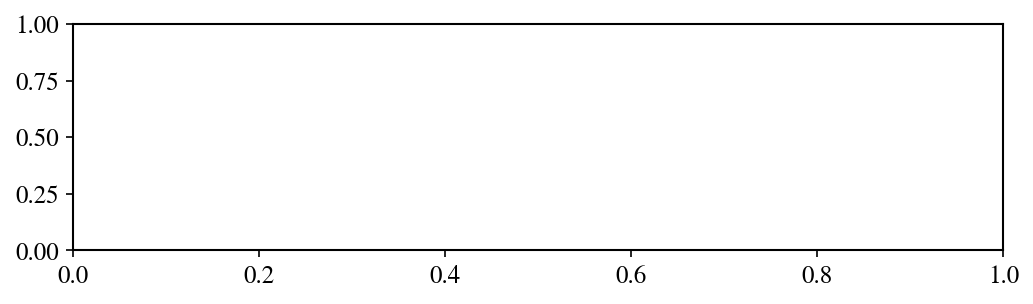

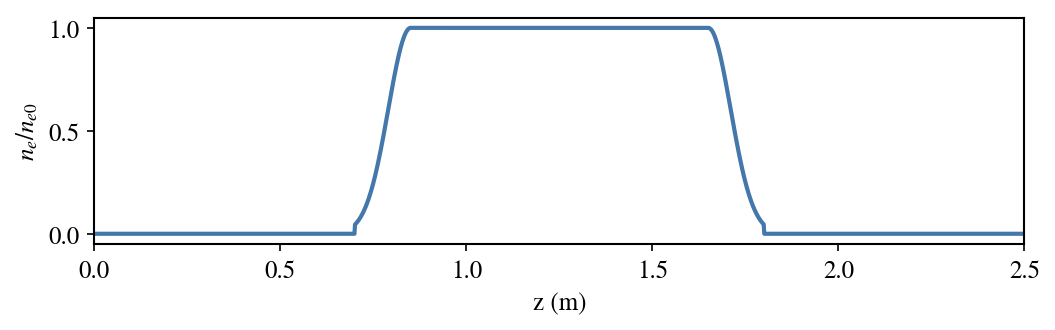

In [315]:
# Distance from picnic basket to oven start is 12in flange to flange
# Assume protected gold mirror for the final mirror
# Plasma density of 3.4e16 
# Plasma length is 60cm
# Ramp length we will estimate as 15cm each, beam should fully ionize this region
# There is 36in from the start of the flattop to the edge of the picnic basket
# Assume 0 is the dge of the picnic basket and the flattop is 1m downstream
length = 80e4
width = 80

# The optic positioning is very flexible

# Create the grid for the setup
Nz = 2**16
Z = 100e6 # Needs to be very large to provide resolution in the frequency domain
z, dz = np.linspace(0, Z, Nz, retstep=True)
frac_l = np.zeros(Nz, dtype='double')

# On axis plasma density profile is given by
# Uniform accelerating plasma
z0 = 0.85e6 # start of the uniform plasma
sel_u = np.logical_and(z > z0, z < z0+length)
frac_l[sel_u] = 1.0

# Entrance ramp
l_ent = 15e4 # length of the entrance ramp
s_ent = 6e4
sel_ent = np.logical_and(z >= z0-l_ent, z <= z0)
ramp_ent = np.exp(-(z-z0)**2/(2*s_ent**2))
frac_l[sel_ent] = ramp_ent[sel_ent]

#Exit ramp
l_ext = 15e4 # length of the entrance ramp
s_ext = 6e4
sel_ext = np.logical_and(z >= z0+length, z <= z0+length+l_ext)
ramp_ext = np.exp(-(z-z0-length)**2/(2*s_ext**2))
frac_l[sel_ext] = ramp_ext[sel_ext]

xlim = [0, 2.5]
#xlim = [2.4, 4]
#xlim = [3.25, 4]
#xlim = [2, 2.5]
plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, frac_l)
plt.xlabel(r'z (m)')
plt.ylabel(r'$n_e/n_{e0}$')
plt.xlim(xlim)
plt.show()

np.save(path+'plasma.npy', [z, frac_l])

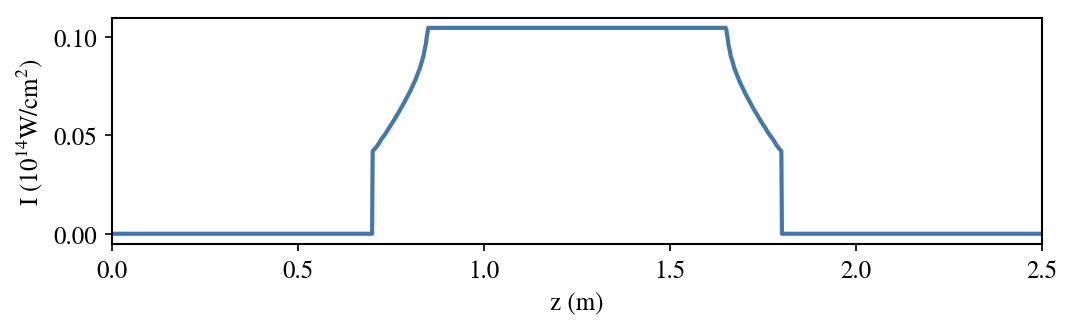

In [9]:
# Calculate the desired on axis intensity profile from the ionization fraction
# Assume a pulse with a Gaussian temporal shape
tau = 30 # RMS pulse length in fs
ion = {'atom' : ionization.Li,
       'tau' : tau,
       'type' : 'gaussian'}
I_l = ionization.intensity_from_density(ion, 0.999*frac_l)

plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, I_l)
plt.xlabel(r'z (m)')
plt.ylabel(r'I ($\mathrm{10^{14}W/cm^2}$)')
plt.xlim(xlim)
plt.show()

Plasma starts at 0.32m and ends at 2.25m


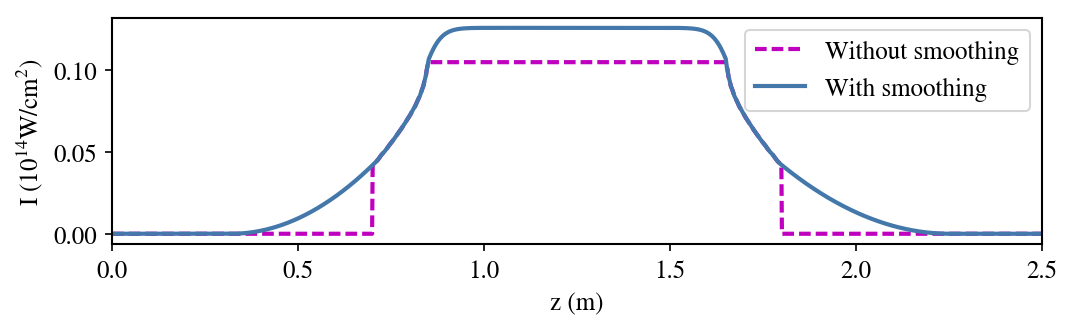

In [10]:
# The intensity profile needs to be smoothed to remove steps and hard corners

# Smooth the center section and increase the intensity
order = 8
Imax = np.amax(I_l)
z_u = z[sel_u]
zc = 0.5*(z_u[-1] + z_u[0])
w = (z_u[0] - zc)**(2*order)/0.6
I_la = np.copy(I_l)
I_new = 0.4*Imax*(np.exp(-(z_u - zc)**(2*order)/w)-0.5)
I_la[sel_u] += I_new

#Smooth the beginning of the entrance ramp with a parabola
I_ent = I_l[sel_ent]
gradI = (I_ent[1] - I_ent[0]) / dz
A = gradI**2 / (4*I_ent[0])
B = z[sel_ent][0] - 2*I_ent[0]/gradI
sel = np.logical_and(z >= B, z < z0-l_ent)
I_la[sel] = A*(z[sel]-B)**2
I_la[z < B] = 0.0
plasma_start = B

#Smooth the end of the exit ramp with a parabola
I_ext = I_l[sel_ext]
gradI = (I_ext[-1] - I_ext[-2]) / dz
A = gradI**2 / (4*I_ext[-1])
B = z[sel_ext][-1] - 2*I_ext[-1]/gradI
sel = np.logical_and(z <= B, z > z0+length+l_ext)
I_la[sel] = A*(z[sel]-B)**2
I_la[z > B] = 0.0
plasma_end = B

print('Plasma starts at %0.2fm and ends at %0.2fm' % (plasma_start/1e6, plasma_end/1e6))
plasma_size = [plasma_start, plasma_end]
np.save(path+'plasma_size.npy', plasma_size)

plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, I_l, '--m')
plt.plot(z/1e6, I_la)
plt.legend(['Without smoothing', 'With smoothing'])
plt.xlabel(r'z (m)')
plt.ylabel(r'I ($\mathrm{10^{14}W/cm^2}$)')
plt.xlim(xlim)
plt.show()

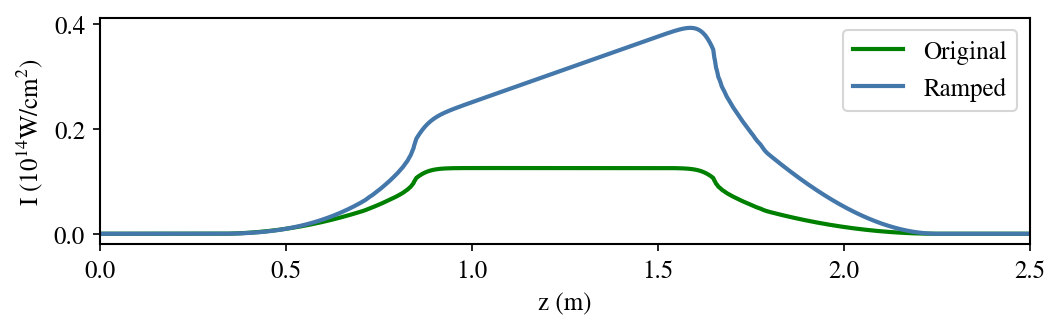

In [11]:
# Add a ramped intensity profile
I_ramped = abs(2*I_la*(1e-6*(z-1e6)+1))
plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, I_la, 'g')
plt.plot(z/1e6, I_ramped)
plt.legend(['Original', 'Ramped'])
plt.xlabel(r'z (m)')
plt.ylabel(r'I ($\mathrm{10^{14}W/cm^2}$)')
plt.xlim(xlim)
plt.show()

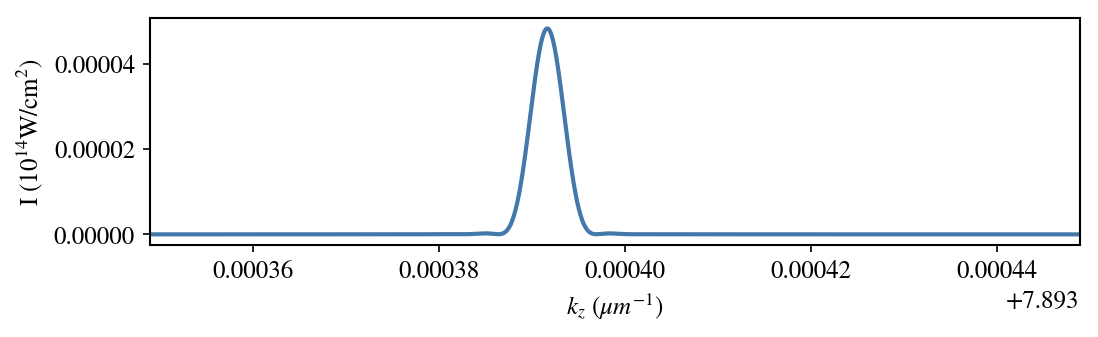

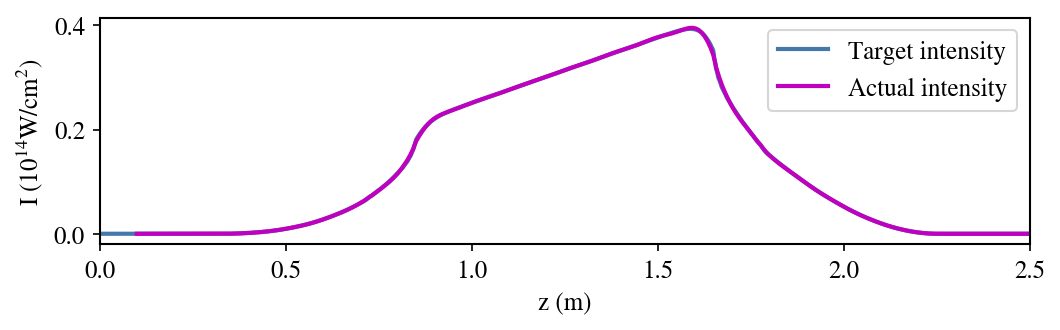

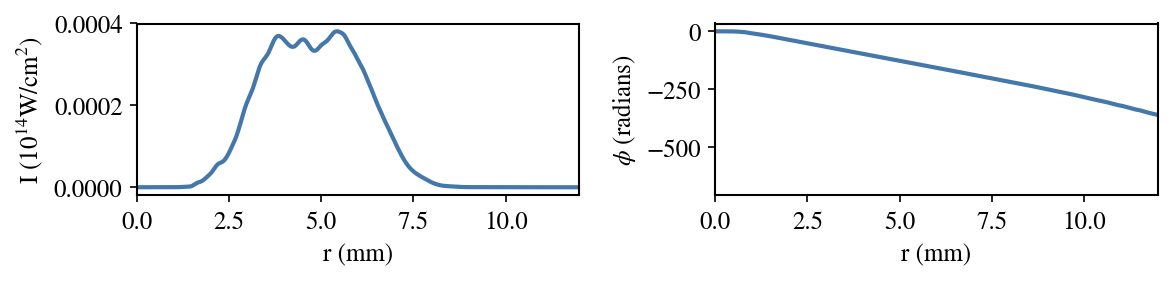

In [371]:
r, E = design.calculate_tran_field(z, I_ramped, 20e3, width, lam, path, 10e-5, xlim, [0, 12])

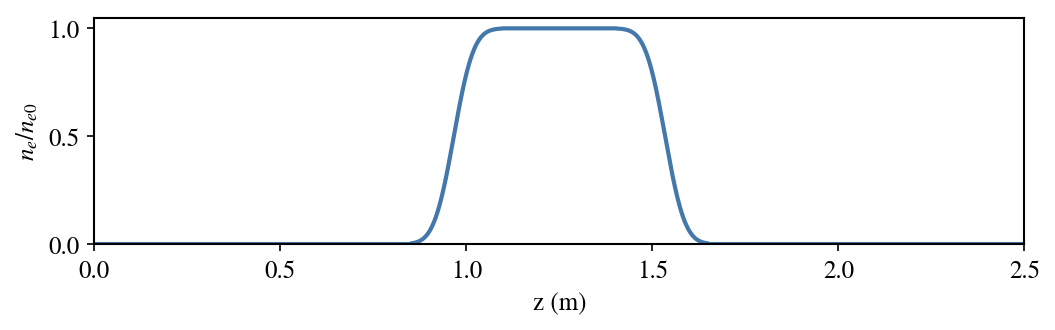

In [316]:
# Create the gas density the laser is going into
Nz = 2**16
n = np.zeros(Nz, dtype='double')
ne0 = 3.4e16/1e17
# Error function ramps?
# Uniform accelerating plasma
length = 30.8e4
z0 = -length/2+1.25e6 # start of the uniform plasma
sel_u = np.logical_and(z > z0, z < z0+length)
n[sel_u] = 1.0

# Entrance ramp
l_ent = 40e4-length/2 # length of the entrance ramp
s_ent = 4.2e4
sel_ent = np.logical_and(z >= z0-l_ent, z <= z0)
ramp_ent = 0.5*(1+erf((z-z0+13e4)/(np.sqrt(2)*s_ent)))
n[sel_ent] = ramp_ent[sel_ent]

#Exit ramp
l_ext = 40e4-length/2 # length of the entrance ramp
s_ext = 4.2e4
sel_ext = np.logical_and(z >= z0+length, z <= z0+length+l_ext)
ramp_ext = 0.5*(1+erf(-(z-z0-13e4-length)/(np.sqrt(2)*s_ent)))
n[sel_ext] = ramp_ext[sel_ext]

plt.figure(figsize=(8, 2), dpi=150)
plt.plot(z/1e6, n)
plt.xlabel(r'z (m)')
plt.ylabel(r'$n_e/n_{e0}$')
plt.xlim(xlim)
plt.ylim(0, 1.05)
plt.show()
# Find the start for the refraction code
start = z0-l_ent
n = interp1d(z, n*ne0)

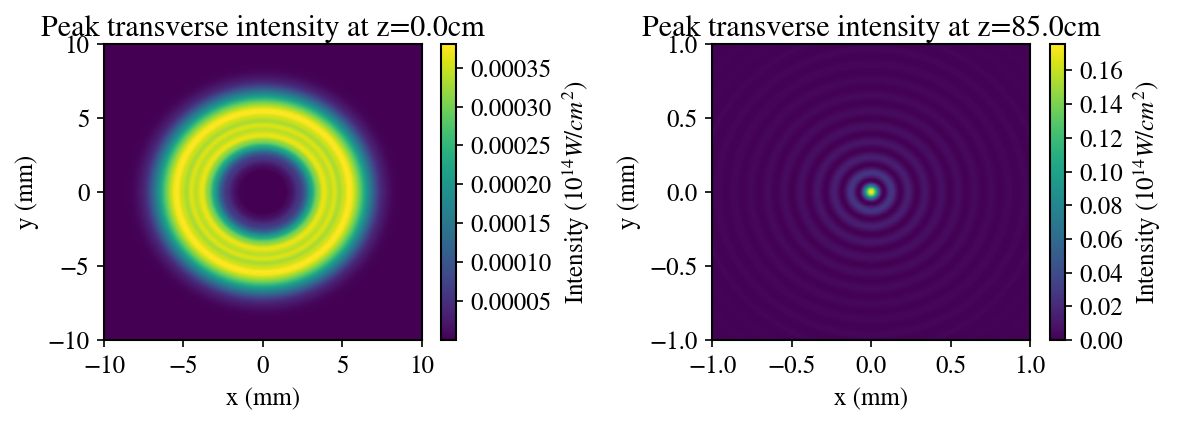

In [15]:
start = z0-l_ent
X = 20e3
Nx = 2**13
beam0, pulseParams = design.propagate_to_start(r, E, start, X, Nx, path, lam, tau, 20, [-1, 1])

In [372]:
beam0.total_cyl_power(r, beam0.intensity_from_field(E))

0.041562412658637186

In [153]:
np.pi*200e-4**2*50*5.39*3.5e16*1.602e-19*1e3

1.8988872989354852

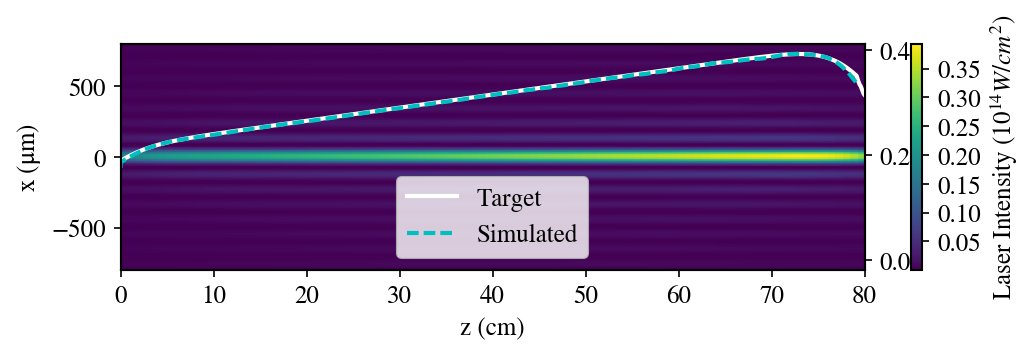

In [16]:
Nx = 2**11
Nz = 100
X = 10e3
Z = 80e4
design.domain_test(X, Nx, Z, Nz, beam0, pulseParams, z, I_ramped, start, [-800, 800])

In [ ]:
Nx = 2**11
X = 10e3
Nz = 400
Z = 80e4
ext = [0, Z/1e4, -X/2, X/2]
pulse, I, ne = design.plasma_refraction(X, Nx, Z, Nz, beam0, pulseParams, ionization.Li, n, start, 2)
design.plot_laser_plasma(I, ne, ext)

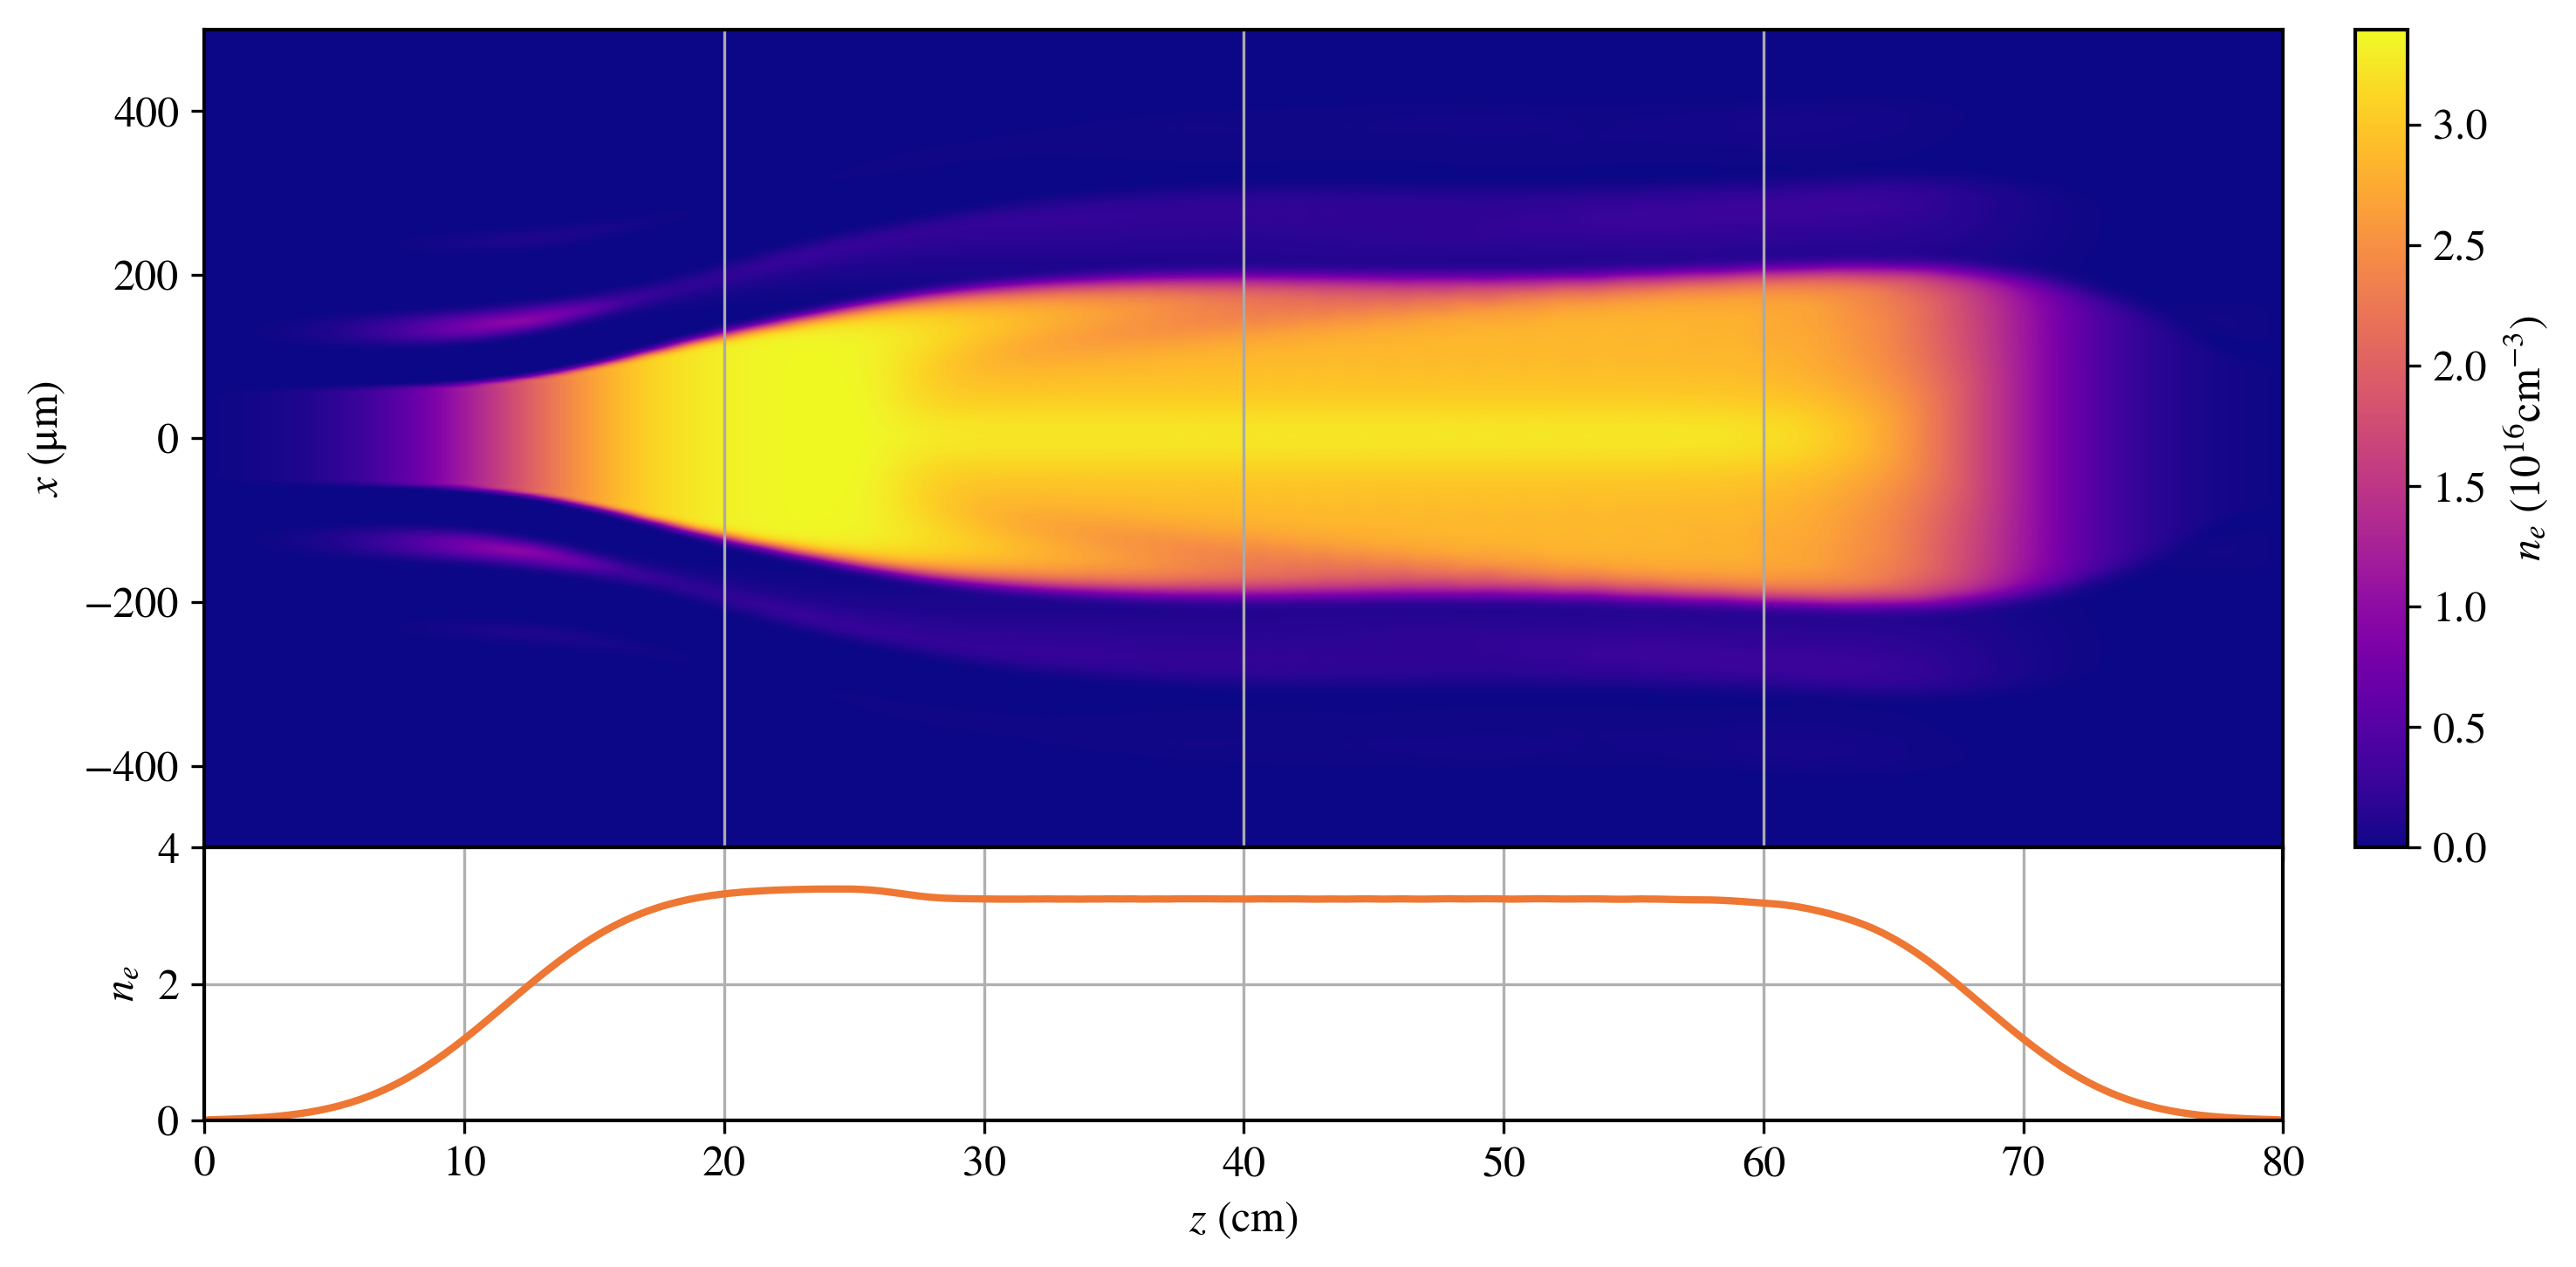

In [70]:
def plot_long_density(pulse, ne):
    fig = plt.figure(figsize=(10, 5), dpi=300)
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 1), width_ratios=(40, 1), hspace=0)
    ax1 = plt.subplot(gs[0, 0])
    im = plt.imshow(np.flipud(np.transpose(ne/1e16)), aspect='auto', extent=ext, cmap='plasma', interpolation='Spline16')
    plt.ylabel(r'$x$ ($\mathrm{\mu m}$)')
    plt.ylim(-500, 500)
    grey2 = '#AAAAAA'
    linewidth = 0.8
    plt.plot([20, 20], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.plot([40, 40], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.plot([60, 60], [-500, 500], '-', c=grey2, linewidth=linewidth)

    ax2 = plt.subplot(gs[0, 1])
    cb = plt.colorbar(im, cax=ax2)
    cb.set_label(r'$n_e$ ($10^{16}\mathrm{cm^{-3}}$)')

    ax3 = plt.subplot(gs[1, 0], sharex=ax1)
    plt.plot(np.array(pulse.z)/1e4, ne[:, int(pulse.Nx/2)]/1e16, c=orange)
    plt.xlim(0, 80)
    plt.ylim(0, 4)
    plt.xlabel('$z$ (cm)')
    plt.ylabel(r'$n_e$')
    plt.grid(True)

    plt.tight_layout()
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    plt.show()
plot_long_density(pulse, ne)

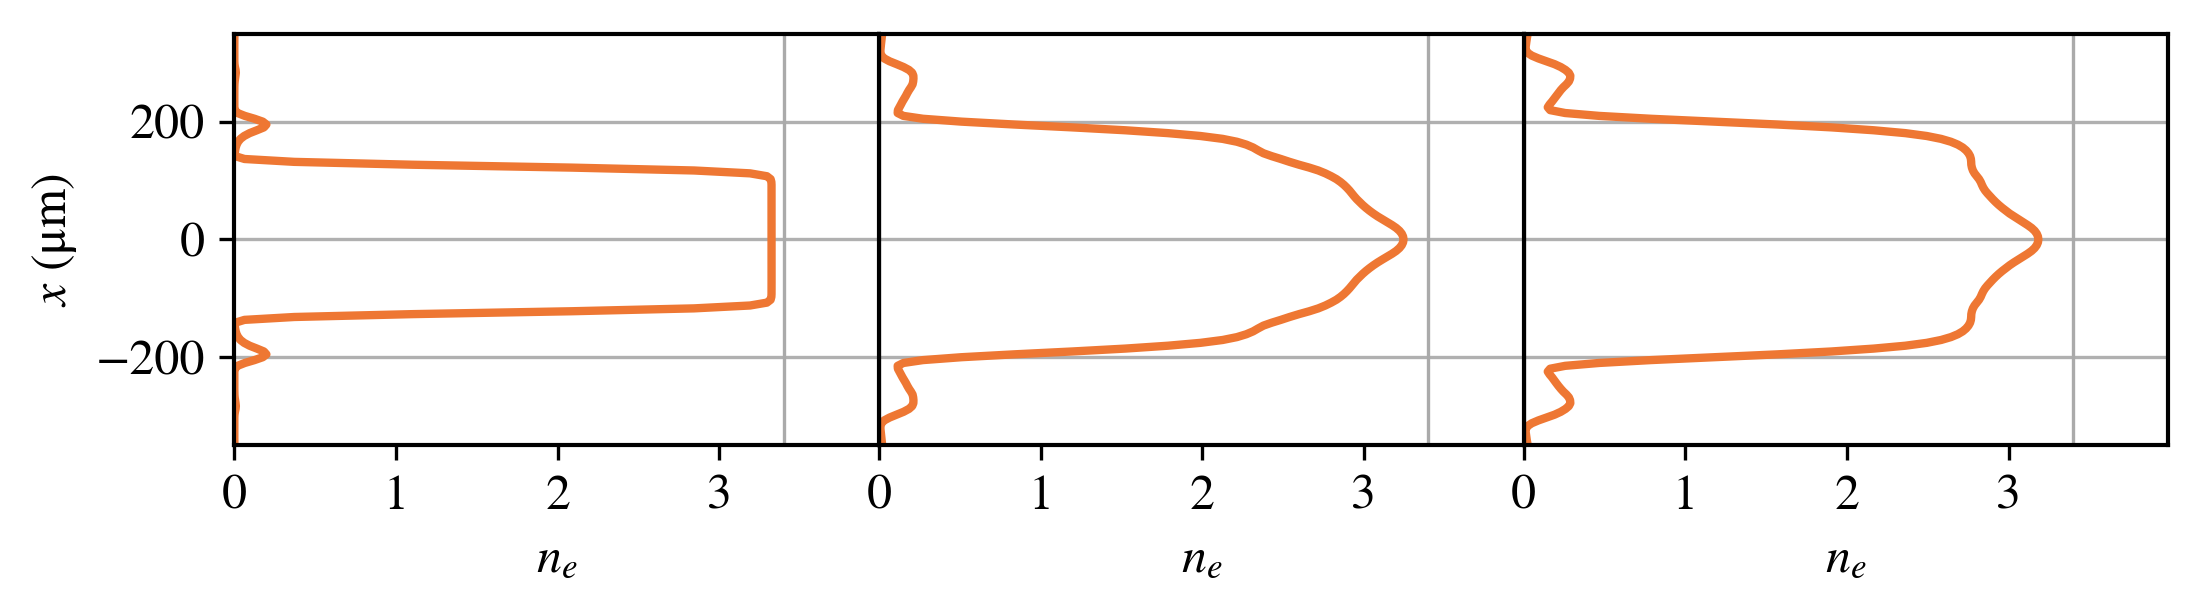

In [105]:
def plot_tran_density(pulse, ne):
    fig = plt.figure(figsize=(7.5, 2.2), dpi=300)
    gs = gridspec.GridSpec(1, 3, wspace=0)
    ax1 = plt.subplot(gs[0, 2])
    plt.plot(ne[int(Nz*60/80), :]/1e16, pulse.x, c=orange)
    plt.plot([ne0*10, ne0*10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.grid(True, axis='y')
    plt.xlim(0, 3.99)
    plt.xlabel(r'$n_e$')

    ax2 = plt.subplot(gs[0, 1], sharey=ax1)
    plt.plot(ne[int(Nz*40/80), :]/1e16, pulse.x, c=orange)
    plt.plot([ne0*10, ne0*10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.grid(True, axis='y')
    plt.xlim(0, 3.99)
    plt.xlabel(r'$n_e$')

    ax3 = plt.subplot(gs[0, 0], sharey=ax2)
    plt.plot(ne[int(Nz*20/80), :]/1e16, pulse.x, c=orange)
    plt.plot([ne0*10, ne0*10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.grid(True, axis='y')
    plt.xlim(0, 3.99)
    plt.xlabel(r'$n_e$')
    plt.ylim(-350, 350)
    plt.ylabel(r'$x$ ($\mathrm{\mu m}$)')
    plt.yticks([-200, 0, 200])

    plt.tight_layout()
    plt.setp([a.get_yticklabels() for a in fig.axes[:-1]], visible=False)
    plt.show()
plot_tran_density(pulse, ne)

In [183]:
design.pulse_evolution(pulse, '80um_2XEnergy', [-500, 500], False)

Frame 30 completed
Frame 60 completed
Frame 90 completed
Frame 120 completed
Frame 150 completed
Frame 180 completed
Frame 210 completed
Frame 240 completed
Frame 270 completed
Frame 300 completed
Frame 330 completed
Frame 360 completed
Frame 390 completed


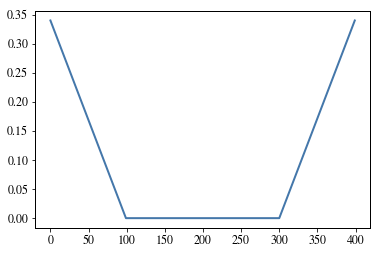

In [346]:
# Helium plasma density
Nz = 400
n_He = np.zeros(Nz)
n_He[:100] = np.linspace(1., 0., 100)
n_He[300:] = np.linspace(0., 1., 100)
n_He = n_He*ne0

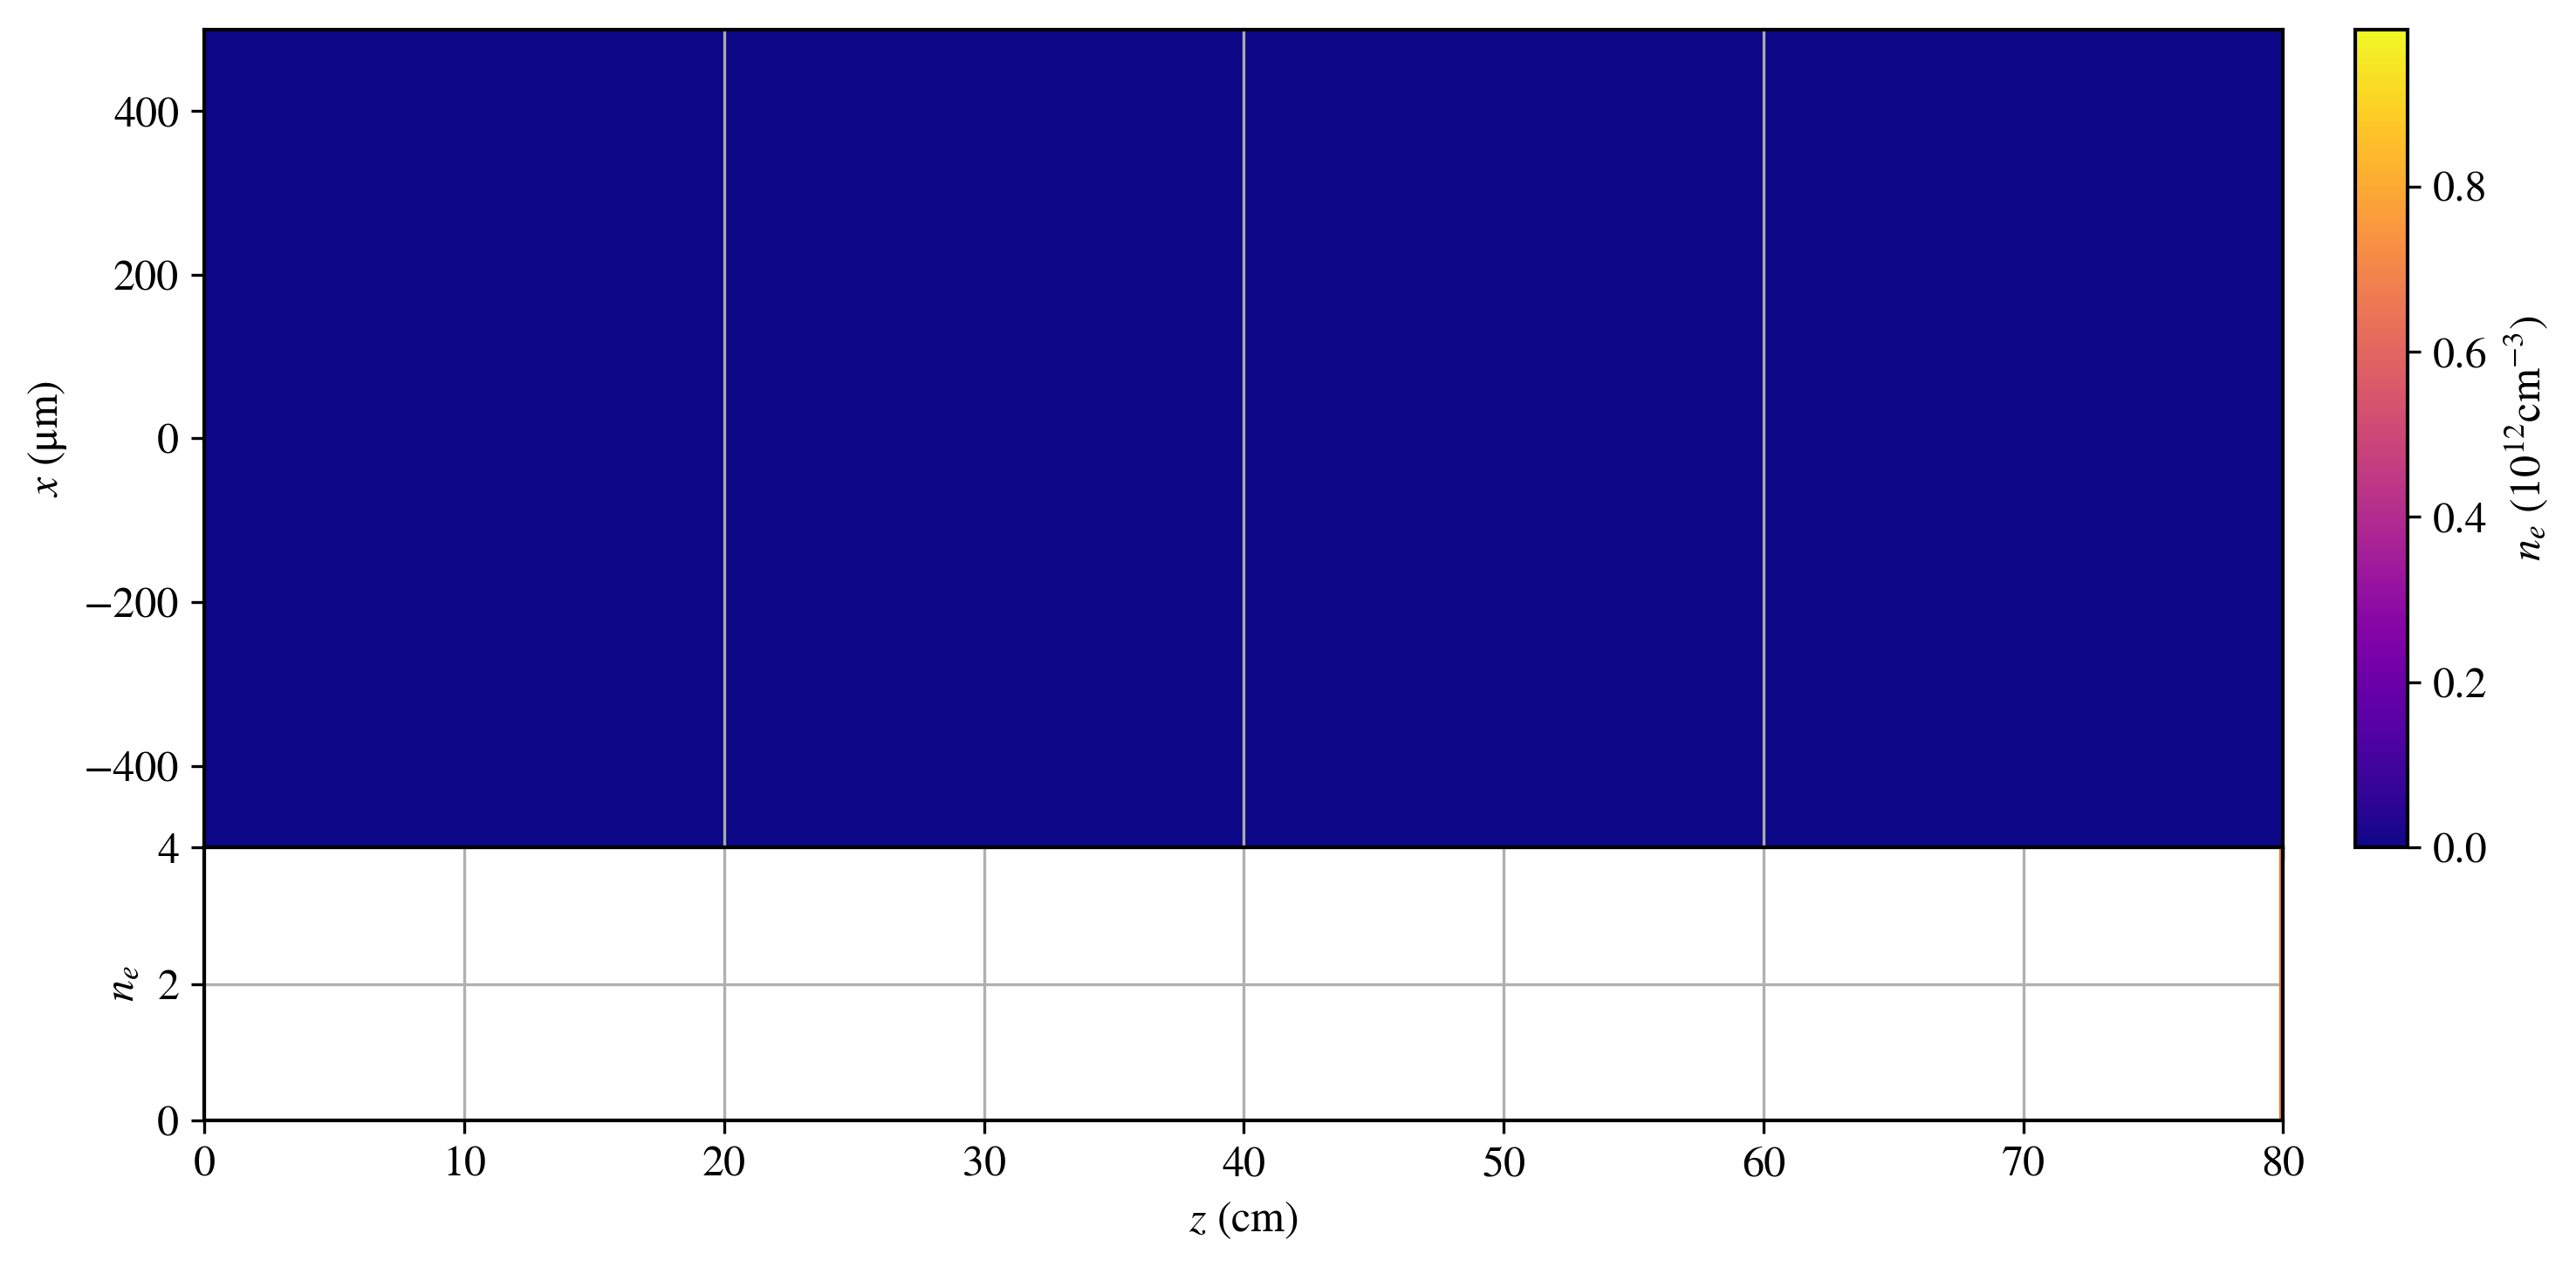

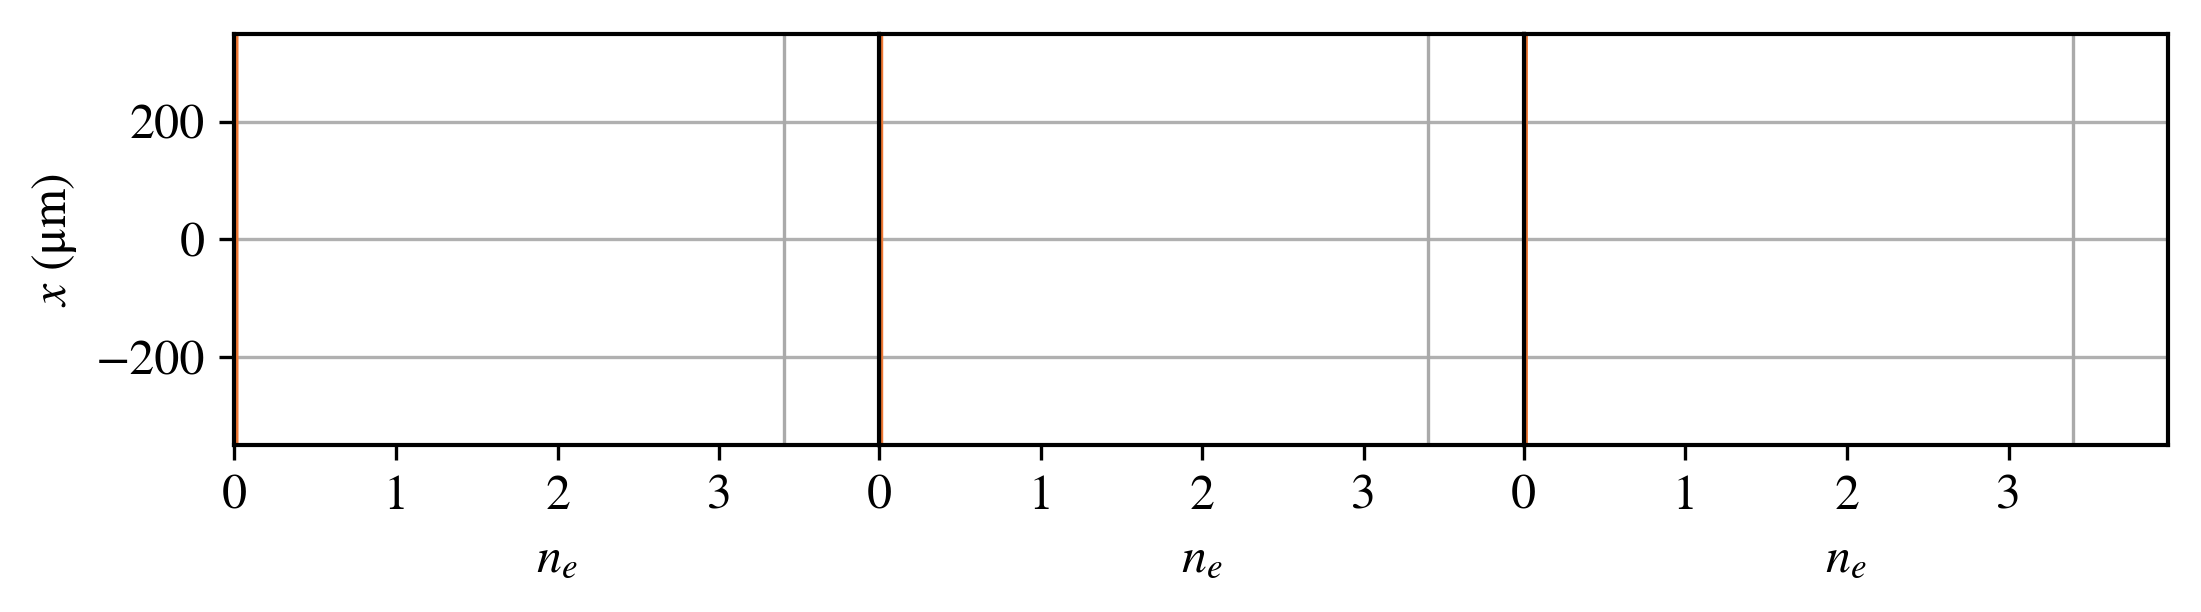

In [353]:
from ionization import adk
Nz = 400
e_He = np.zeros((Nz, Nx), dtype='double')
for i in range(Nz):
    e_He[i, :] = np.amax(abs(pulse.load_field(i)[0]), axis=0)
atom = ionization.He
ne_He = adk.gaussian_frac(atom['EI'], e_He, tau, atom['Z'], atom['l'], atom['m'])
ne_He = ne_He*n_He[:, None]

fig = plt.figure(figsize=(10, 5), dpi=300)

gs = gridspec.GridSpec(2, 2, height_ratios=(3, 1), width_ratios=(40, 1), hspace=0)
ax1 = plt.subplot(gs[0, 0])
im = plt.imshow(np.flipud(np.transpose(ne_He*10*1e4)), aspect='auto', extent=ext, cmap='plasma', interpolation='Spline16',
               vmin=0, vmax=0.99)
plt.ylabel(r'$x$ ($\mathrm{\mu m}$)')
plt.ylim(-500, 500)
grey2 = '#AAAAAA'
linewidth = 0.8
plt.plot([20, 20], [-500, 500], '-', c=grey2, linewidth=linewidth)
plt.plot([40, 40], [-500, 500], '-', c=grey2, linewidth=linewidth)
plt.plot([60, 60], [-500, 500], '-', c=grey2, linewidth=linewidth)

ax2 = plt.subplot(gs[0, 1])
cb = plt.colorbar(im, cax=ax2)
cb.set_label(r'$n_e$ ($10^{12}\mathrm{cm^{-3}}$)')

ax3 = plt.subplot(gs[1, 0], sharex=ax1)
plt.plot(np.array(pulse.z)/1e4, ne[:, int(pulse.Nx/2)], c=orange)
plt.xlim(0, 80)
plt.ylim(0, 4)
plt.xlabel('$z$ (cm)')
plt.ylabel(r'$n_e$')
plt.grid(True)

plt.tight_layout()
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.show()
plot_tran_density(pulse, ne_He)

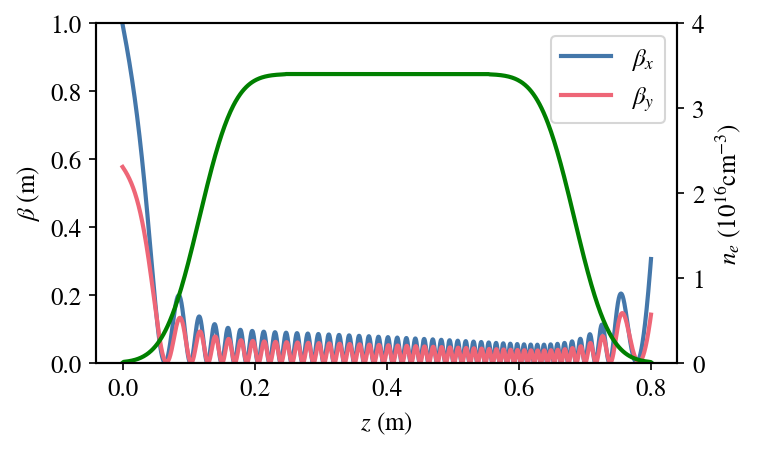

In [374]:
# Find optimal s* for witness, use this to calculate drive beam evolution
# From drive beam CS parameters, calculate ionization fraction
# Combine ionization fraction with existing plasma density to get new density
import beam.calc.electron as ecalc
N = 3500
beta0 = 0.9960
alpha0 = 5.1291
gb0 = 20000
dgdz0 = -15.0*2000
z = np.linspace(0, 0.8, N)
ne_cs = n(z*1e6+start)
beta_x, alpha_x, gamma, gb = ecalc.cs_propagation(z, ne_cs, beta0, alpha0, gb0, dgdz0, ne0)
beta0 = 57.66e-2
alpha0 = 1.448
beta_y, alpha_y, gamma, gb = ecalc.cs_propagation(z, ne_cs, beta0, alpha0, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta_x, label=r'$\beta_x$')
plt.plot(z, beta_y, label=r'$\beta_y$')
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$\beta$ (m)')
plt.legend(loc=1)
plt.ylim(0, 1)
plt.twinx()
plt.plot(z, ne_cs*10, 'g')
plt.ylabel(r'$n_e$ ($10^{16}\mathrm{cm^{-3}}$)')
plt.ylim(0.0, 4)
plt.show()

beta_x = interp1d(z*1e6, beta_x)
beta_y = interp1d(z*1e6, beta_y)

In [375]:
# Calculate the radial electric field from the beam
sys.path.insert(0, "../../khuntstone/")
import eBeam_v02 as eb
import plotty as pl
from scipy.integrate import simps

def calc_Er(beam, pos):
    r = pulse.x*1e-6
    xi = pos['xi']
    sigma_r = beam_x['sigma_r']
    sigma_z = beam_x['sigma_z']
    rp = np.reshape(r, (len(r), 1))
    rp[rp==0] = 1e-12
    Er = np.zeros((len(sigma_r), len(r), len(xi)))
    ppK   =  eb.peak_charge_dens(beam_x);
    eps0 = 8.854e-12
    for i in range(len(sigma_r)):
        Er[i,:,:] = (ppK[i] * sigma_r[i]**2 / (eps0 * rp)) * \
                    (1 - np.exp(-rp**2/(2*sigma_r[i]**2))) * \
                    np.exp(-(xi)**2 / (2 * sigma_z**2))
        Er[i, :,:] = Er[i,:,:] / 1e9;
    return Er

In [376]:
beam_x = eb.get_beam(gb[0], 20e-6, np.array(beta_x(pulse.z)), 6.4e-6, 1.6e-9)
pos = eb.get_pos(beam_x, nxi=5, nr=10)
Er_x = calc_Er(beam_x, pos)

In [377]:
beam_y = eb.get_beam(gb[0], 20e-6, np.array(beta_y(pulse.z)), 6.4e-6, 1.6e-9)
pos = eb.get_pos(beam_y, nxi=5, nr=10)
Er_y = calc_Er(beam_y, pos)

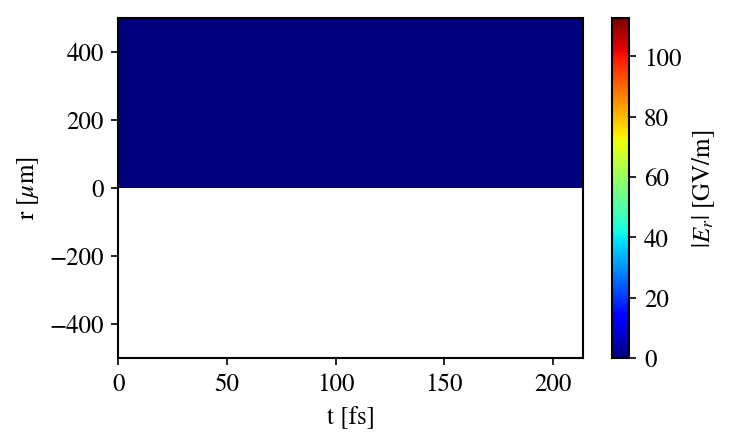

In [378]:
ind = 100
c = 2.99e8
t = (pos['xi'] * 1e15 / (beam_x['beta']*c)) -\
    (pos['xi'][0]*1e15 /(beam_x['beta']*c)); 
ext = [min(t), max(t), min(r)*1e6, max(r)*1e6]
fig1 = plt.figure(figsize = (5,3), dpi = 150)
ax1 = fig1.gca()
img1 = ax1.imshow(np.flipud(abs(Er_x[ind])), cmap = 'jet',aspect = 'auto', \
    extent = ext)
cbar1 = plt.colorbar(mappable = img1, ax = ax1)
cbar1.set_label('$|E_r|$ [GV/m]')

ax1.set_xlabel('t [fs]');
ax1.set_ylabel('r [$\mu$m]');
plt.ylim(-500, 500)
plt.show()

In [379]:
atom = ionization.Li
rate_x = adk.rate_static(atom['EI'], abs(Er_x), atom['Z'], atom['l'], atom['m'])
frac_Li_x = eb.ionization_frac(rate_x, pos, beam_x)[0]

In [380]:
atom = ionization.Li
rate_y = adk.rate_static(atom['EI'], abs(Er_y), atom['Z'], atom['l'], atom['m'])
frac_Li_y = eb.ionization_frac(rate_y, pos, beam_y)[0]

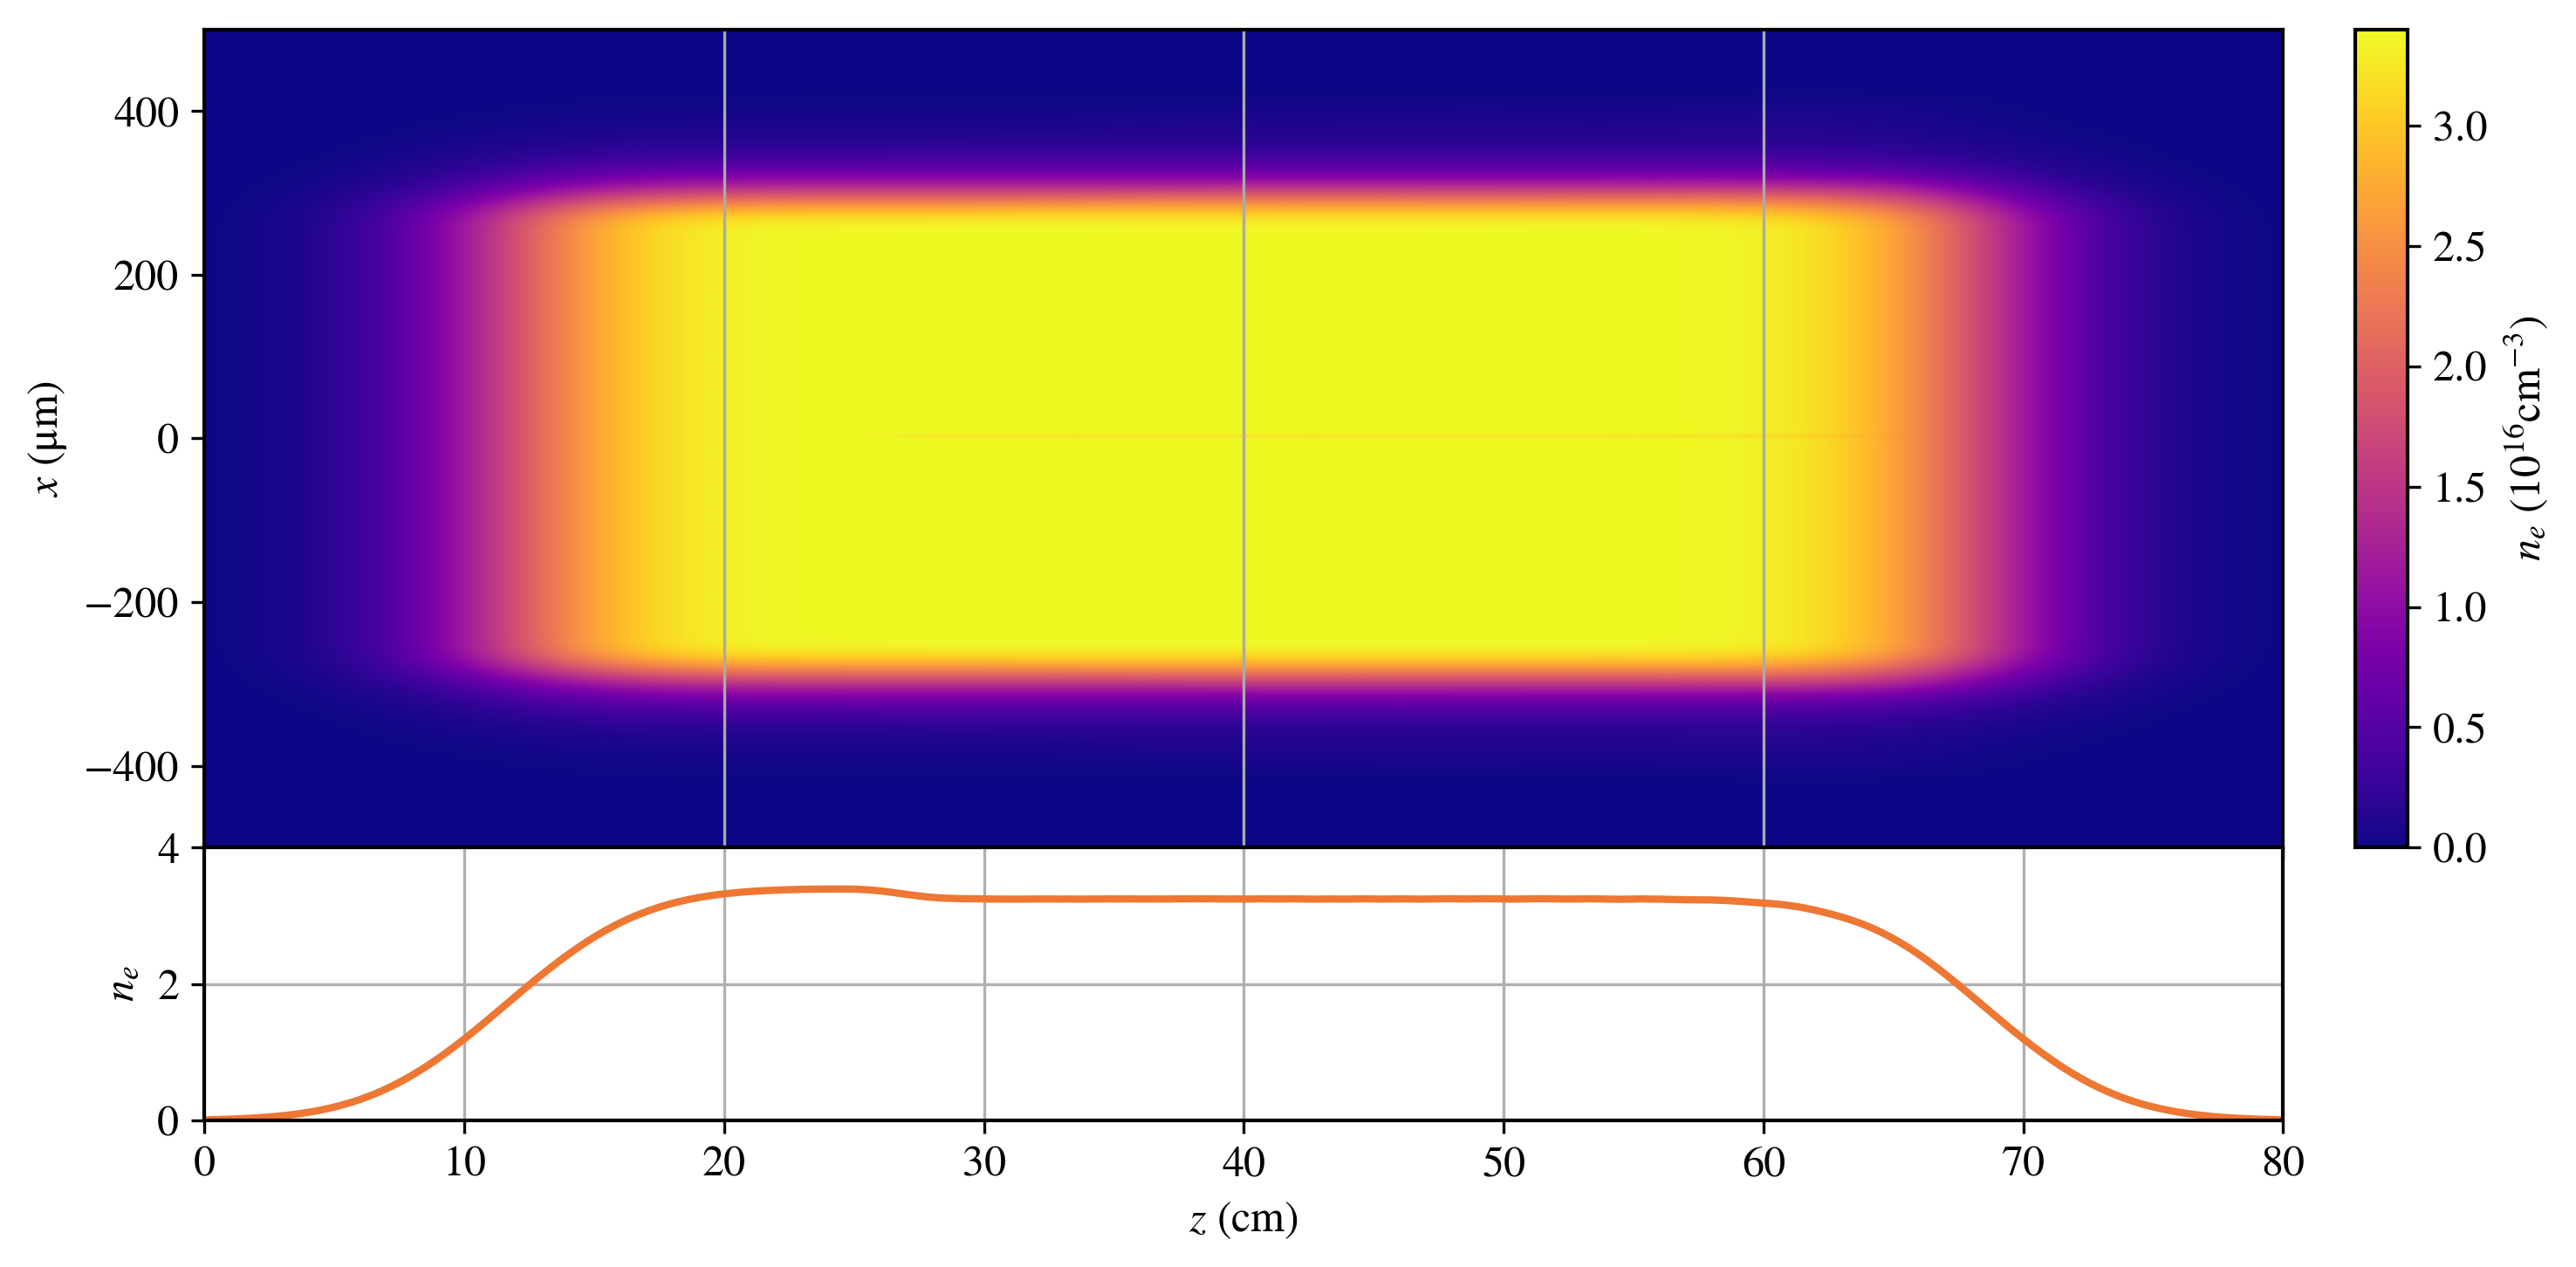

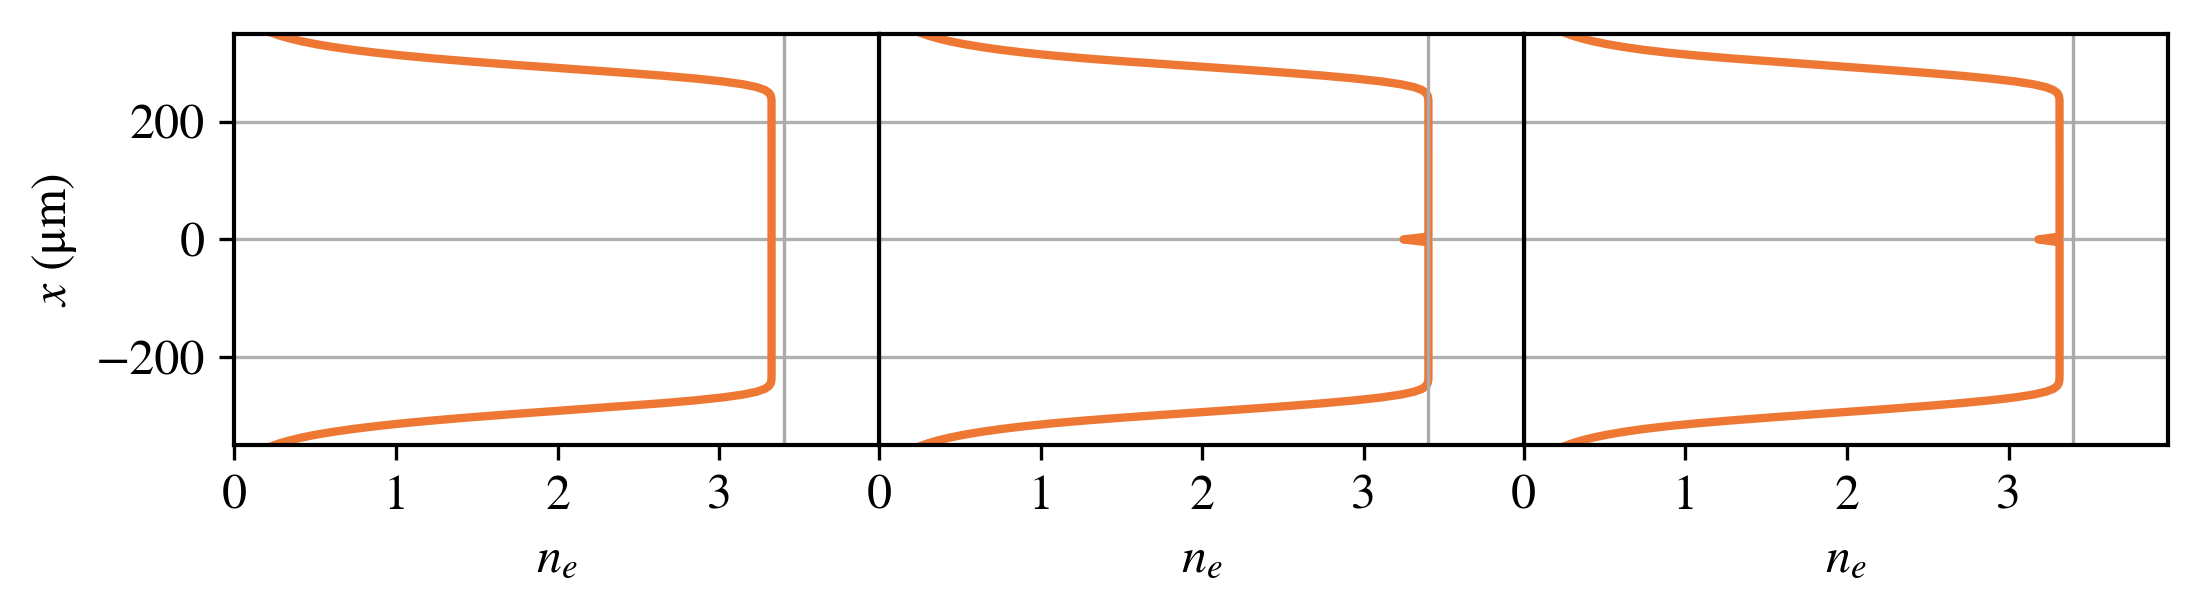

In [381]:
Nz = 400
ext = [0, 80, -pulse.X/2, pulse.X/2]
ne_init = n(np.array(pulse.z)+start)[:, None]*np.ones(pulse.Nx)*1e17
ne_Li_x = ne + (ne_init-ne)*frac_Li_x
plot_long_density(pulse, ne_Li_x)
plot_tran_density(pulse, ne_Li_x)

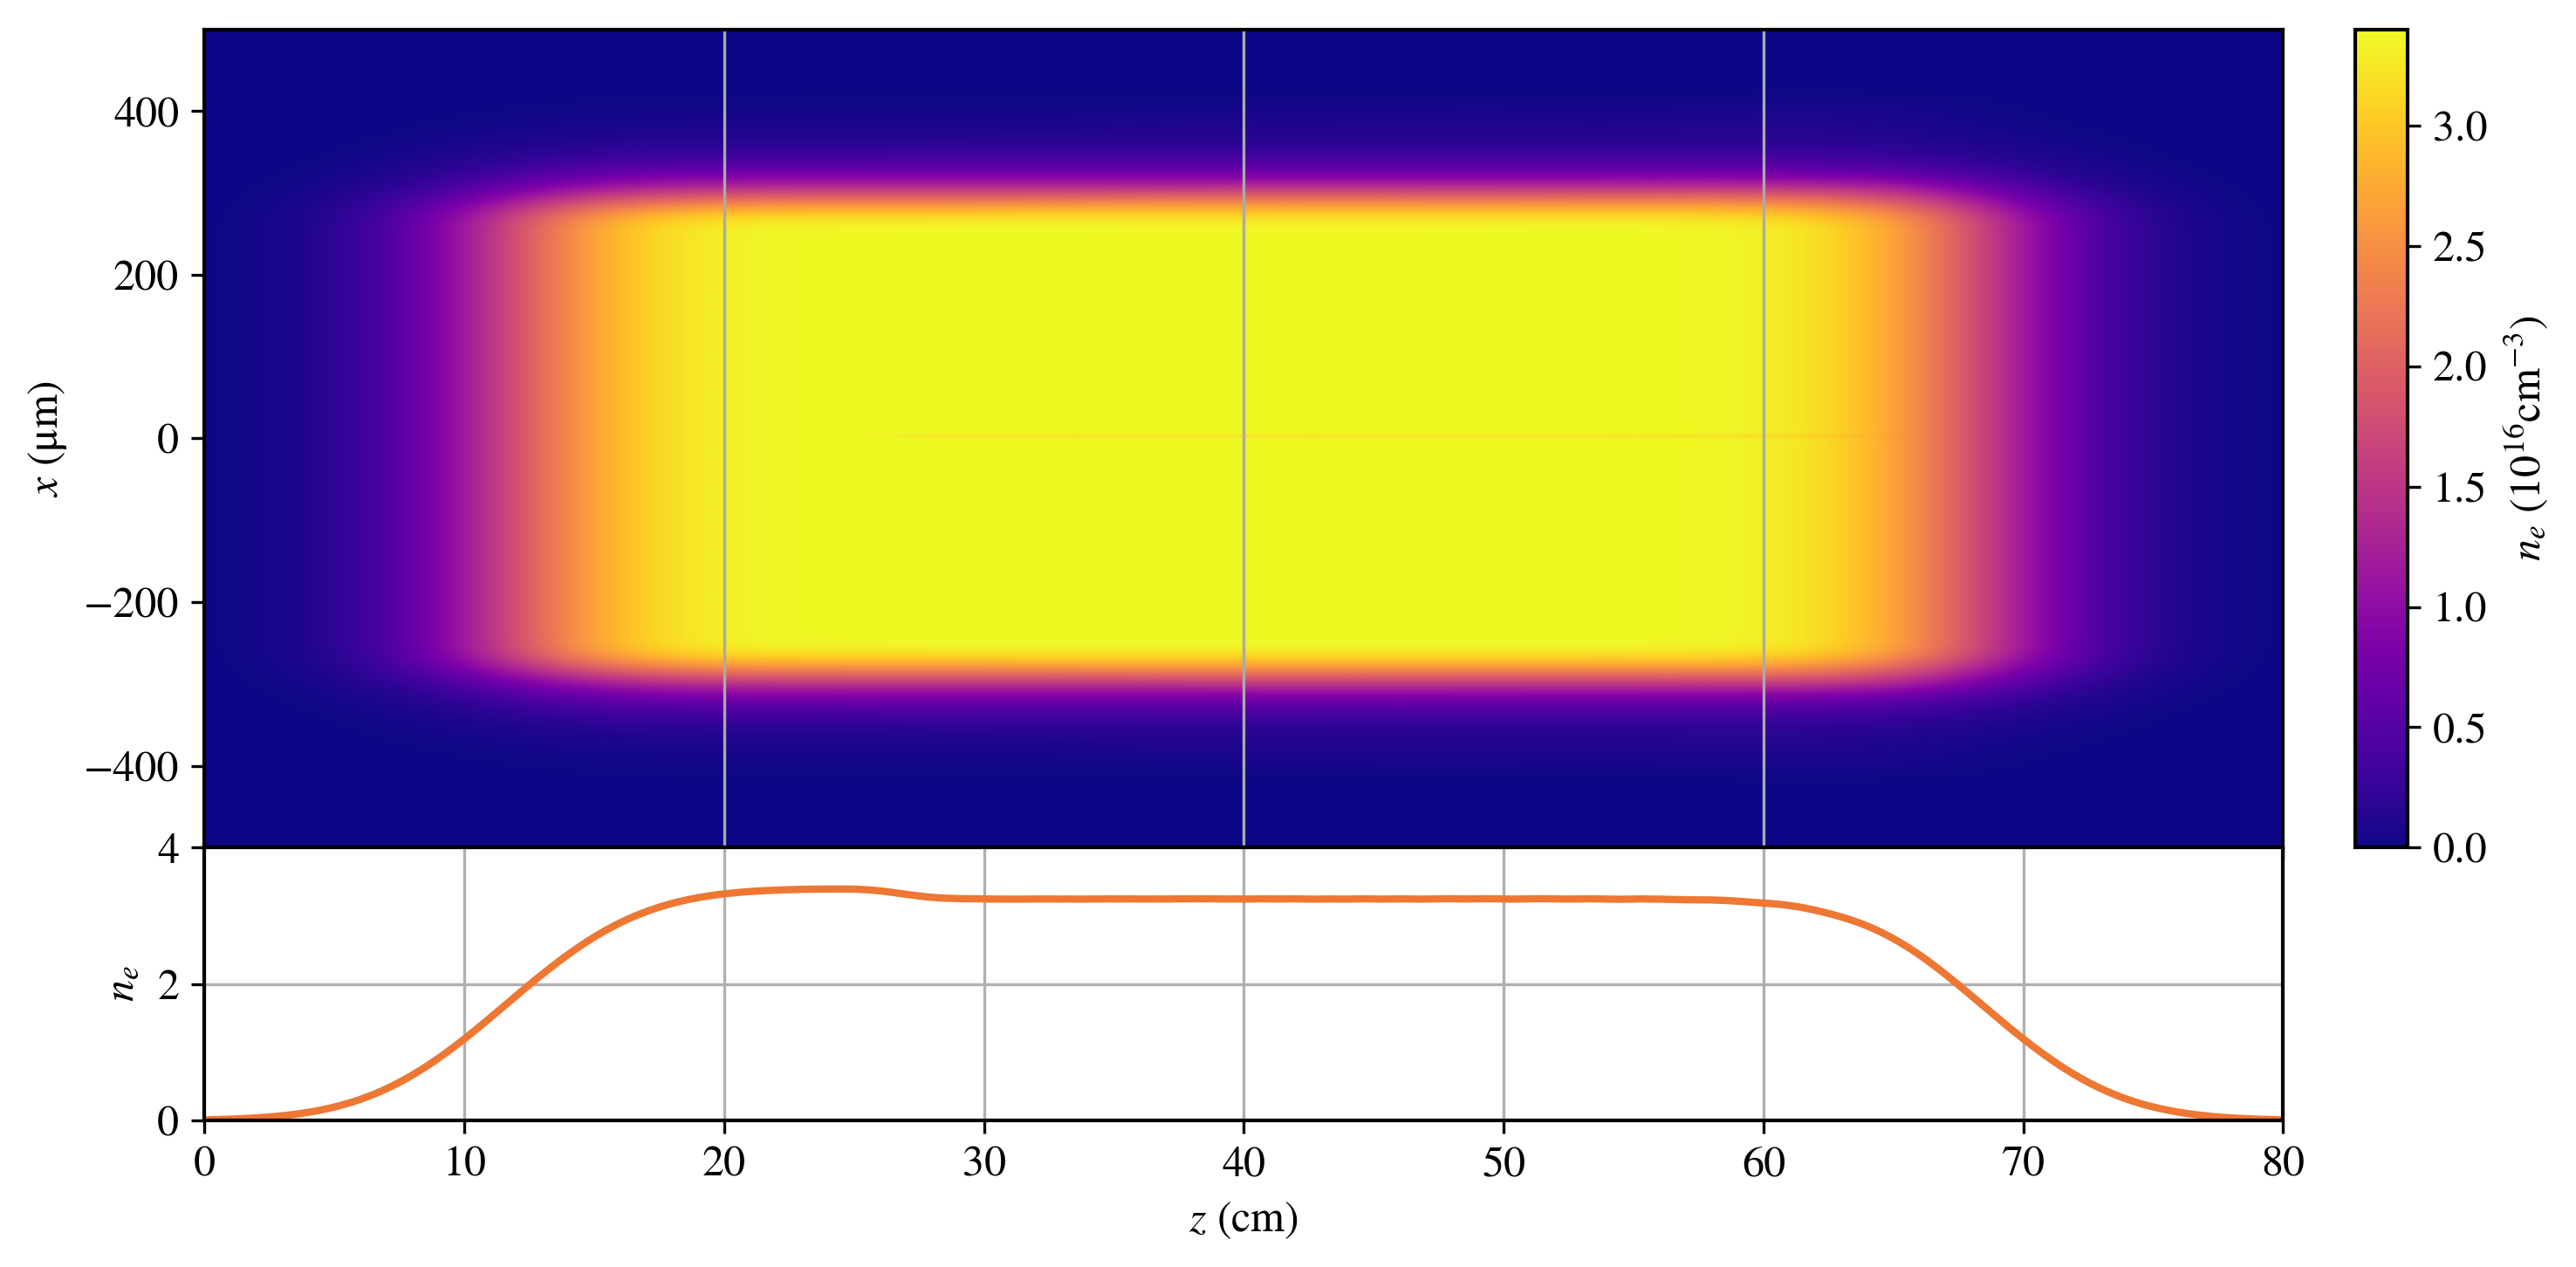

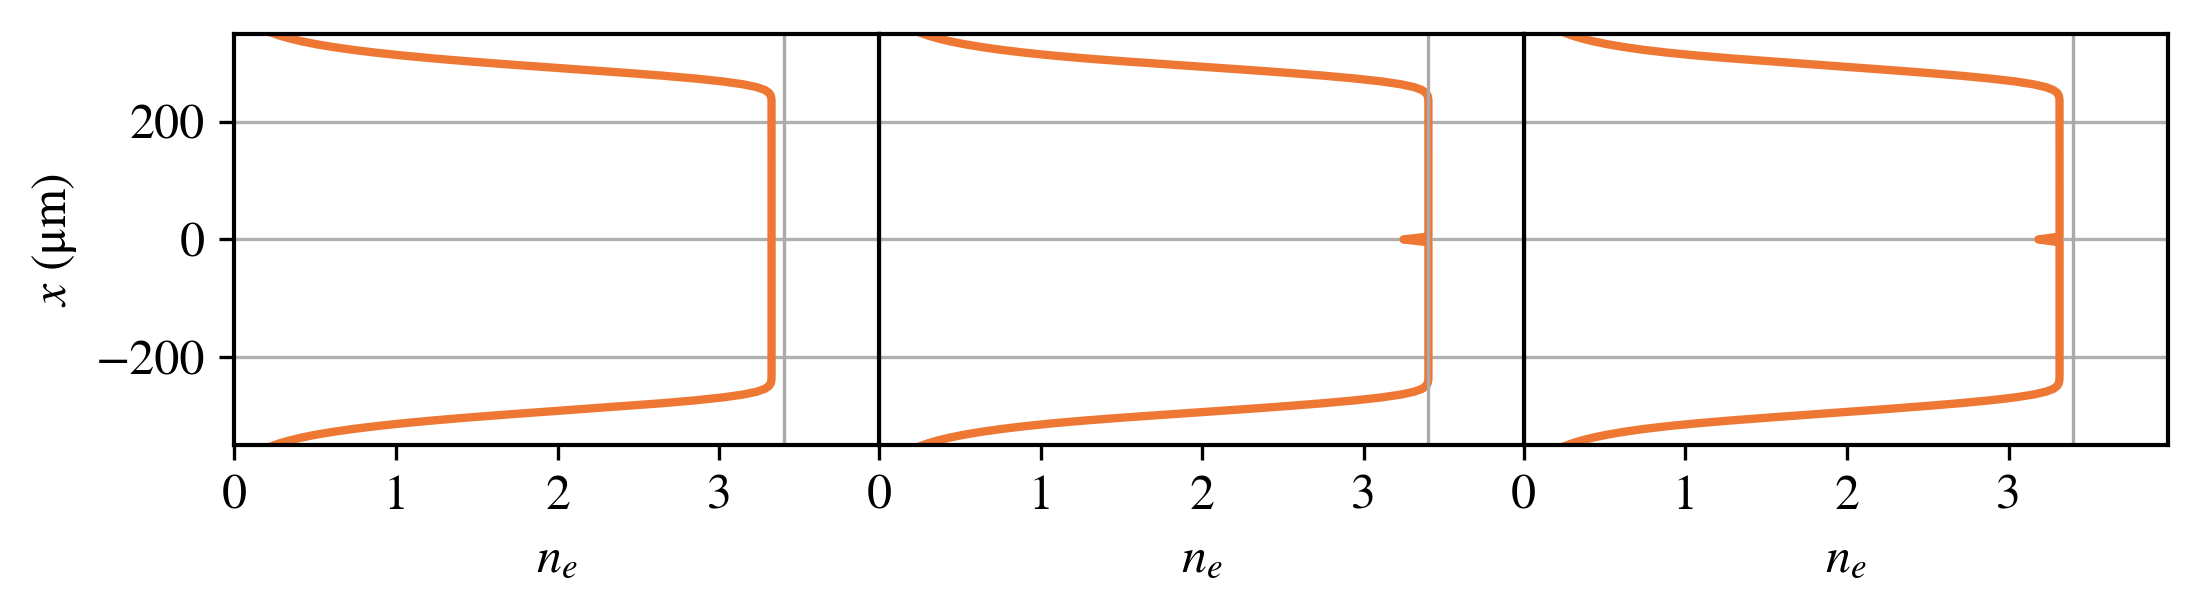

In [382]:
ext = [0, 80, -pulse.X/2, pulse.X/2]
ne_init = n(np.array(pulse.z)+start)[:, None]*np.ones(pulse.Nx)*1e17
ne_Li_y = ne + (ne_init-ne)*frac_Li_y
plot_long_density(pulse, ne_Li_y)
plot_tran_density(pulse, ne_Li_y)

In [383]:
atom = ionization.He
rate_x_He = adk.rate_static(atom['EI'], abs(Er_x), atom['Z'], atom['l'], atom['m'])
frac_He_x = eb.ionization_frac(rate_x_He, pos, beam_x)[0]

In [384]:
atom = ionization.He
rate_y_He = adk.rate_static(atom['EI'], abs(Er_y), atom['Z'], atom['l'], atom['m'])
frac_He_y = eb.ionization_frac(rate_y_He, pos, beam_y)[0]

In [394]:
def plot_long_density(pulse, ne):
    fig = plt.figure(figsize=(10, 5), dpi=300)
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 1), width_ratios=(40, 1), hspace=0)
    ax1 = plt.subplot(gs[0, 0])
    im = plt.imshow(np.flipud(np.transpose(ne/1e16)), aspect='auto', extent=ext, cmap='plasma', interpolation='Spline16')
    plt.ylabel(r'$x$ ($\mathrm{\mu m}$)')
    plt.ylim(-500, 500)
    grey2 = '#AAAAAA'
    linewidth = 0.8
    plt.plot([10, 10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.plot([40, 40], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.plot([70, 70], [-500, 500], '-', c=grey2, linewidth=linewidth)

    ax2 = plt.subplot(gs[0, 1])
    cb = plt.colorbar(im, cax=ax2)
    cb.set_label(r'$n_e$ ($10^{16}\mathrm{cm^{-3}}$)')

    ax3 = plt.subplot(gs[1, 0], sharex=ax1)
    plt.plot(np.array(pulse.z)/1e4, ne[:, int(pulse.Nx/2)]/1e16, c=orange)
    plt.xlim(0, 80)
    plt.ylim(0, 4)
    plt.xlabel('$z$ (cm)')
    plt.ylabel(r'$n_e$')
    plt.grid(True)

    plt.tight_layout()
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    plt.show()
    
def plot_tran_density(pulse, ne):
    fig = plt.figure(figsize=(7.5, 2.2), dpi=300)
    gs = gridspec.GridSpec(1, 3, wspace=0)
    ax1 = plt.subplot(gs[0, 2])
    plt.plot(ne[int(Nz*70/80), :]/1e16, pulse.x, c=orange)
    plt.plot([ne0*10, ne0*10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.grid(True, axis='y')
    plt.xlim(0, 3.99)
    plt.xlabel(r'$n_e$')

    ax2 = plt.subplot(gs[0, 1], sharey=ax1)
    plt.plot(ne[int(Nz*40/80), :]/1e16, pulse.x, c=orange)
    plt.plot([ne0*10, ne0*10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.grid(True, axis='y')
    plt.xlim(0, 3.99)
    plt.xlabel(r'$n_e$')

    ax3 = plt.subplot(gs[0, 0], sharey=ax2)
    plt.plot(ne[int(Nz*10/80), :]/1e16, pulse.x, c=orange)
    plt.plot([ne0*10, ne0*10], [-500, 500], '-', c=grey2, linewidth=linewidth)
    plt.grid(True, axis='y')
    plt.xlim(0, 3.99)
    plt.xlabel(r'$n_e$')
    plt.ylim(-70, 70)
    plt.ylabel(r'$x$ ($\mathrm{\mu m}$)')
    plt.yticks([-40, 0, 40])

    plt.tight_layout()
    plt.setp([a.get_yticklabels() for a in fig.axes[:-1]], visible=False)
    plt.show()

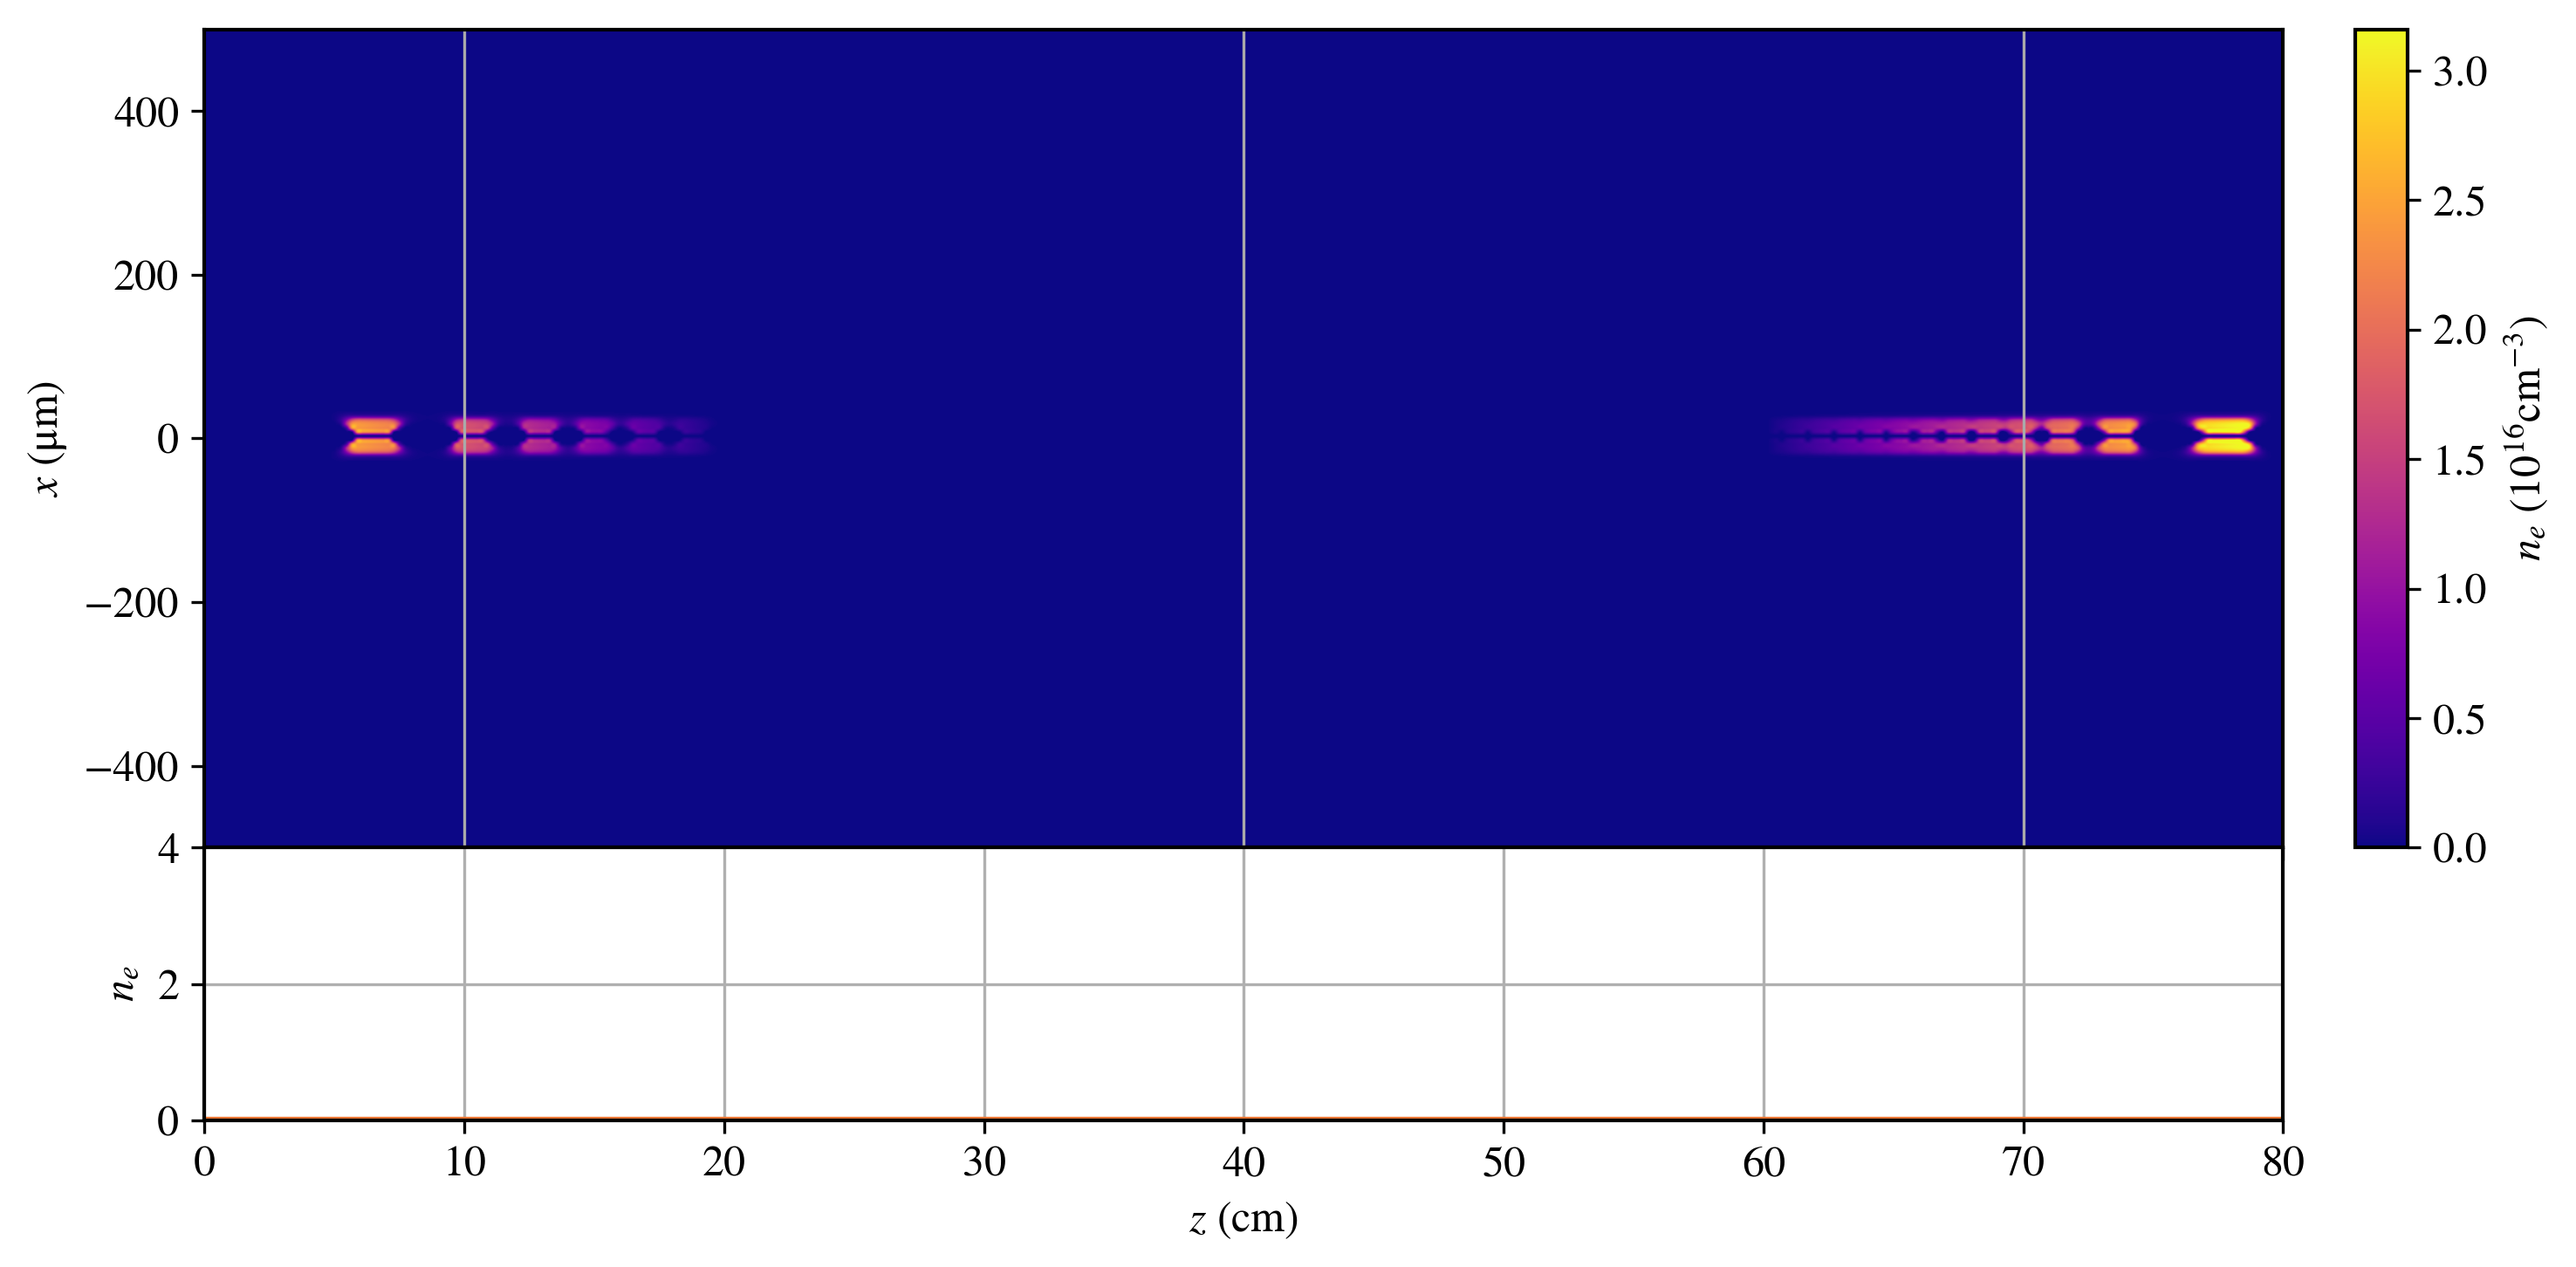

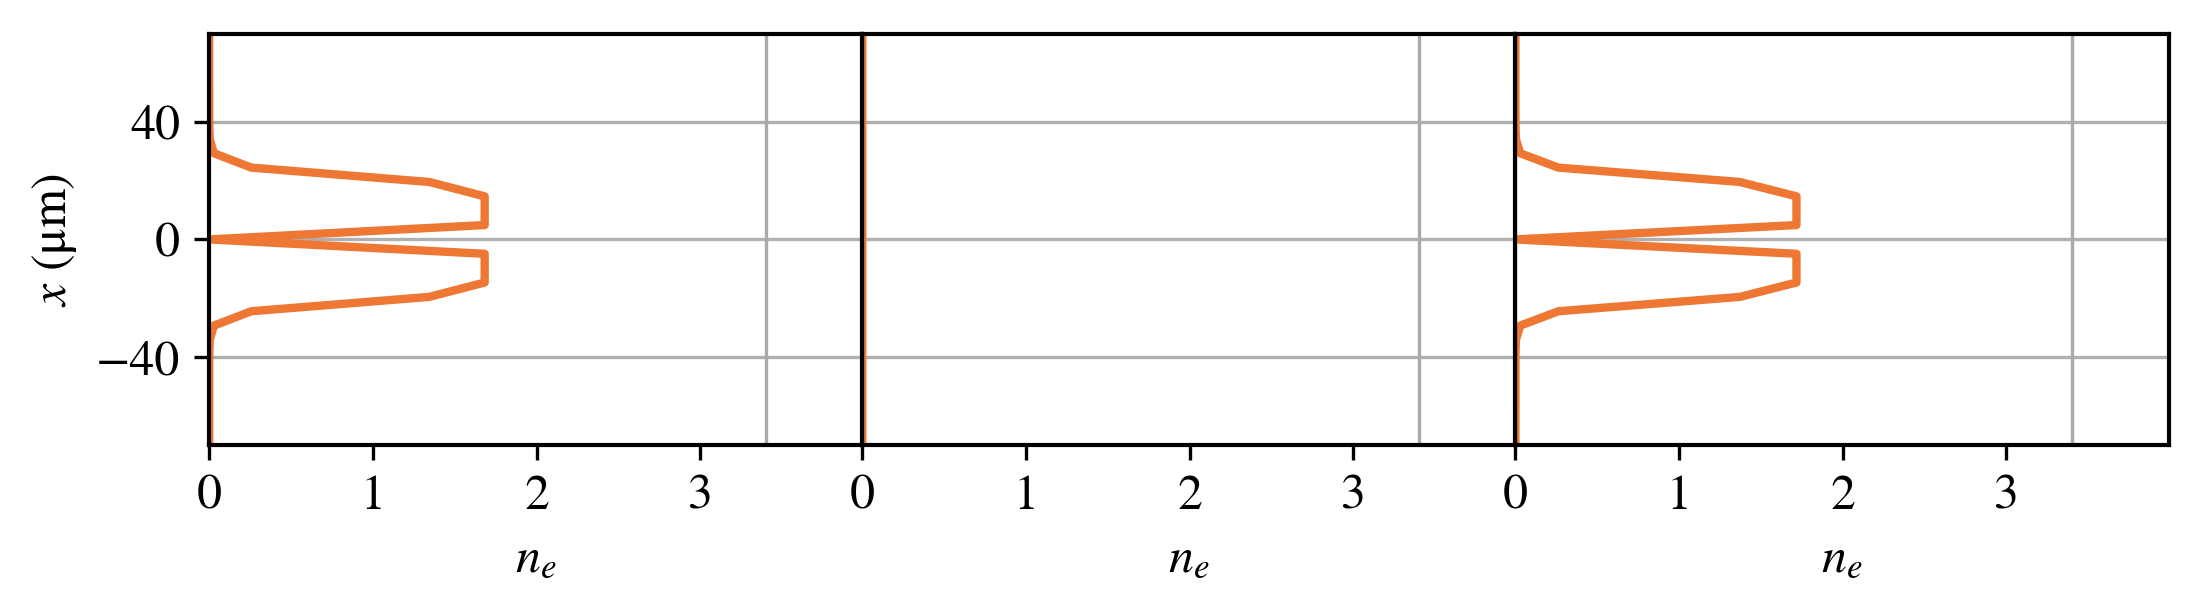

In [395]:
Nz = 400
ext = [0, 80, -pulse.X/2, pulse.X/2]
ne_He_x = frac_He_x*n_He[:, None]*1e17
plot_long_density(pulse, ne_He_x)
plot_tran_density(pulse, ne_He_x)

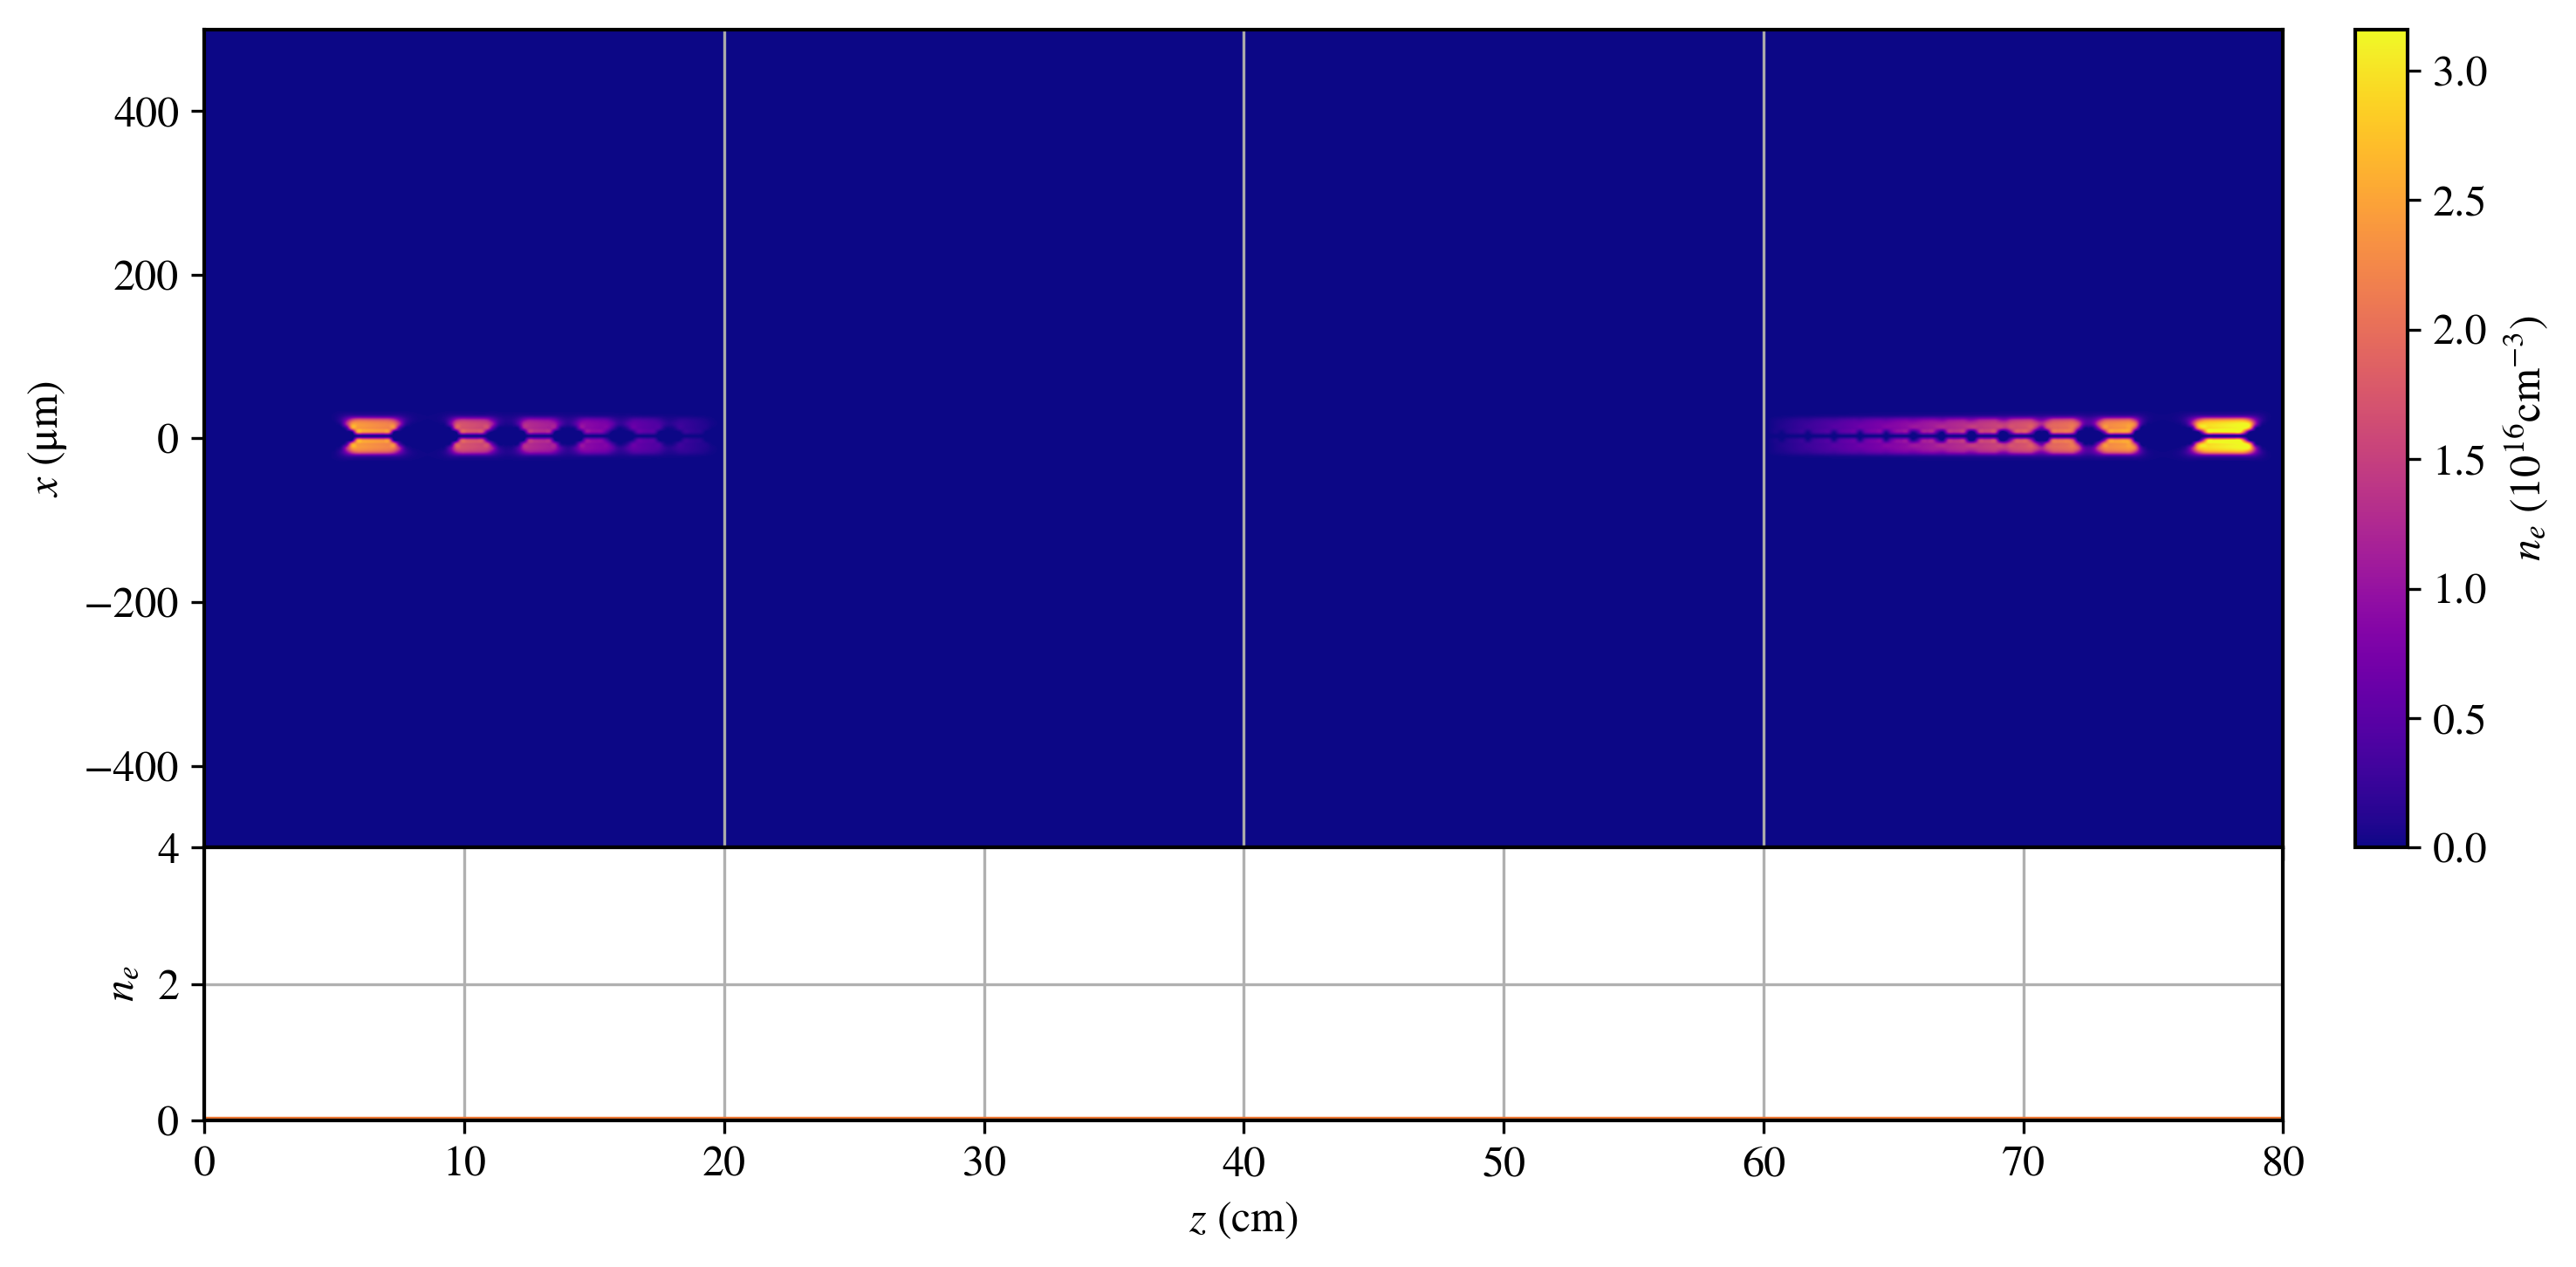

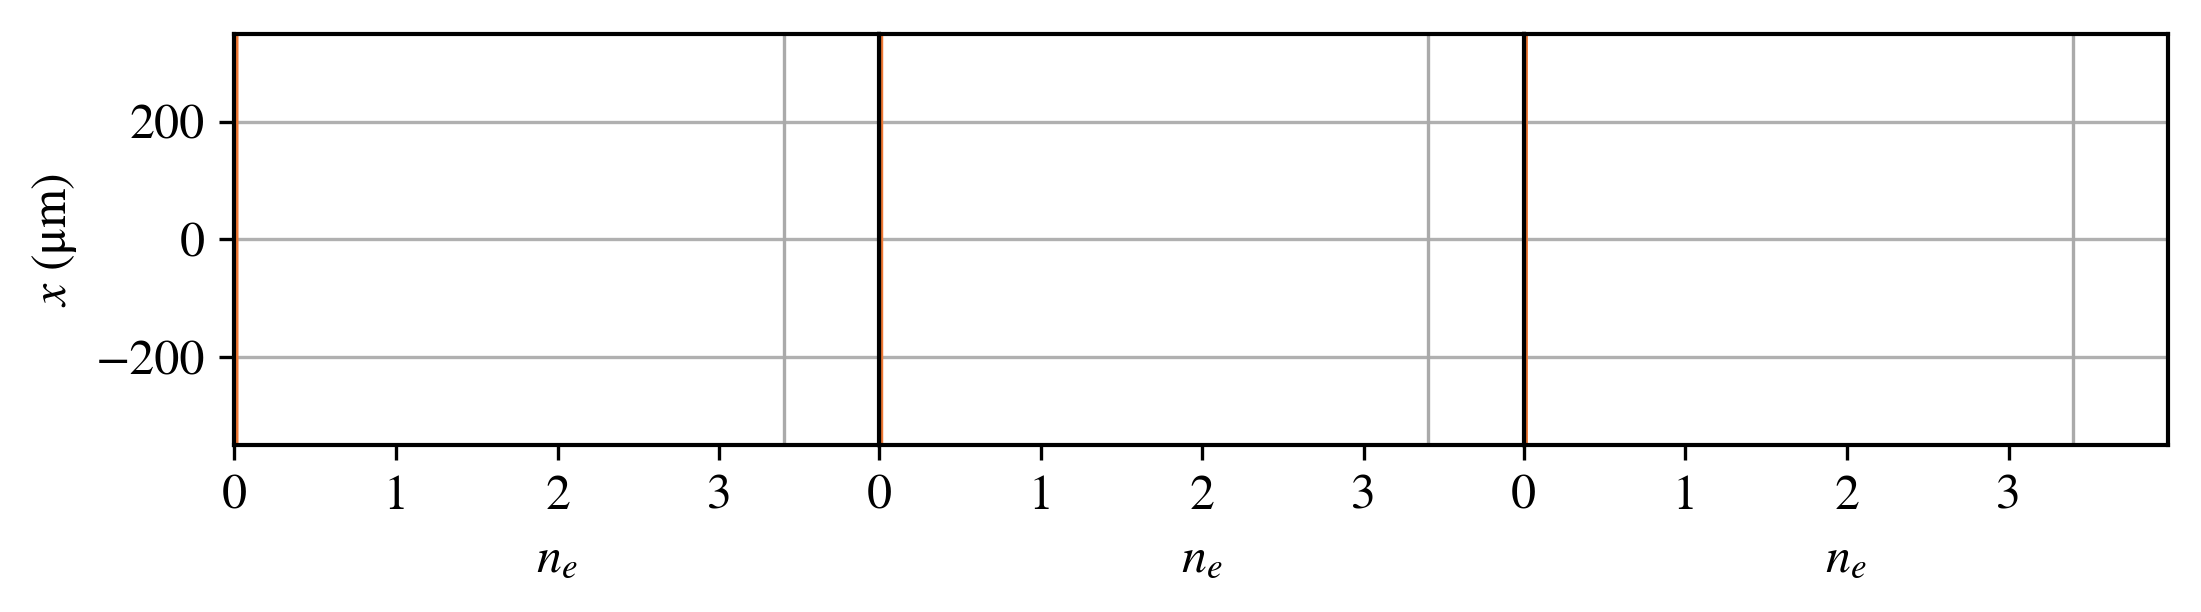

In [386]:
Nz = 400
ext = [0, 80, -pulse.X/2, pulse.X/2]
ne_He_y = frac_He_y*n_He[:, None]*1e17
plot_long_density(pulse, ne_He_y)
plot_tran_density(pulse, ne_He_y)

In [106]:
# Beam intensity downstream
Nx = 2**11
X = 50e3
pulseParams['name'] = 'Post_Plasma'
pulseParams['Nx'] = Nx
pulseParams['Ny'] = Nx
pulseParams['X'] = X
pulseParams['Y'] = X
pulse1 = laserpulse.Pulse(pulseParams)
e0 = np.array(pulse.e)
e = pulse1.e
for i in range(pulse.Nt):
    e[i, :, :] = pulse1.reconstruct_from_cyl(pulse.x, e0[i, :, int(pulse.Ny/2)], pulse1.x, pulse1.y)
pulse1.initialize_field(e)

In [ ]:
Nz = 1000
Z = 4e6
z = np.linspace(0, Z, Nz)
pulse1.propagate(z, 1.0)

In [108]:
I1 = np.zeros((Nz, Nx), dtype='double')
for i in range(Nz):
    I1[i, :] = np.amax(pulse1.intensity_from_field(pulse1.load_field(i)[0]), axis=0)
I1 = pulse1.prep_data(I1)

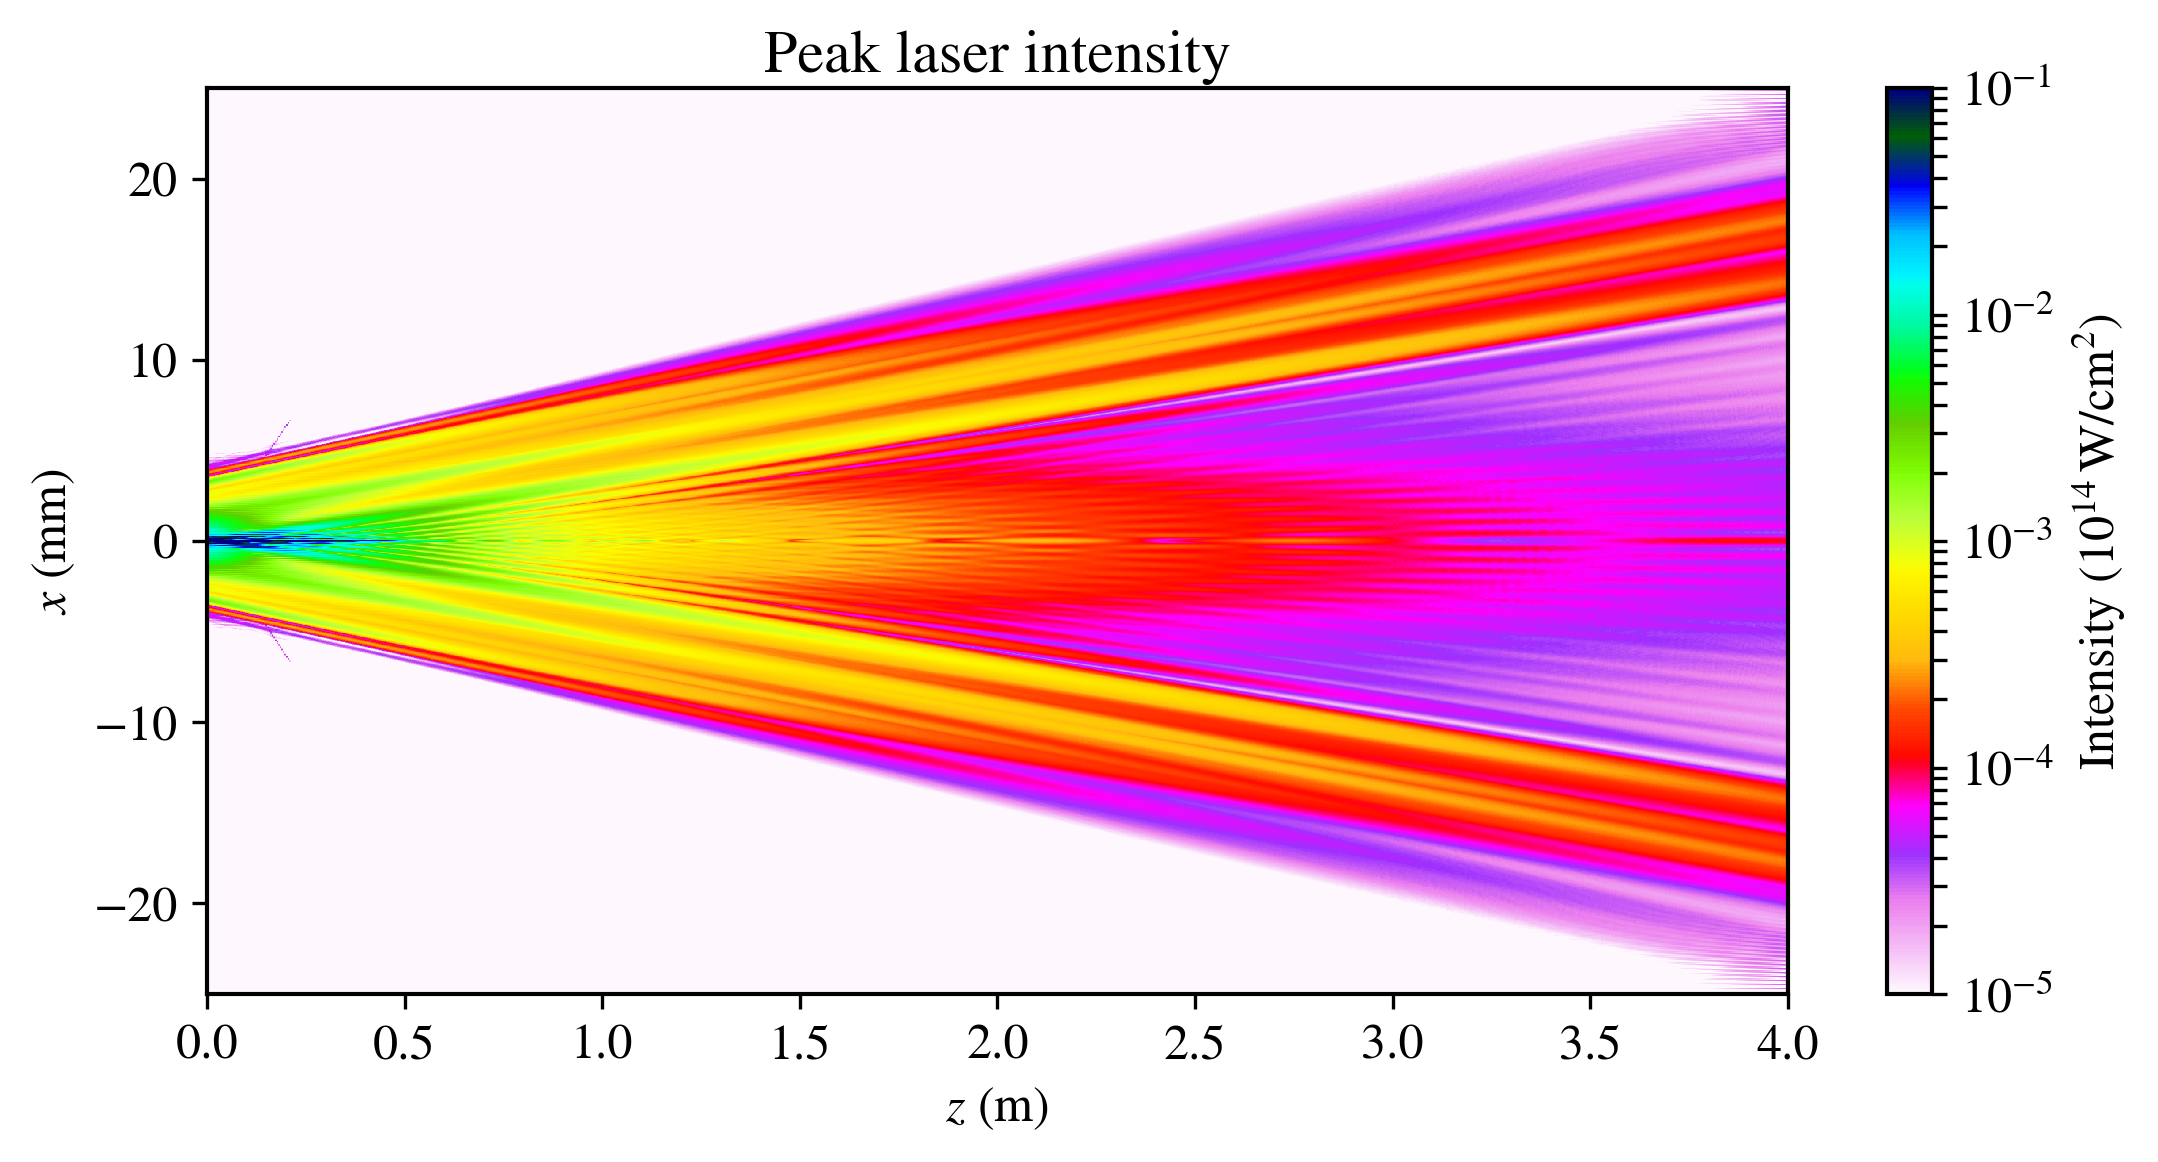

In [112]:
import matplotlib.colors as colors
plt.figure(figsize=(8.5, 4), dpi=300)
norm = colors.LogNorm(vmin=1e-5, vmax=0.1)
im = plt.imshow(I1, aspect='auto', extent=[0, Z/1e6, -X/2e3, X/2e3], norm=norm)
cb = plt.colorbar()
cb.set_label(r'Intensity ($10^{14}\,\mathrm{W/cm^2}$)')
plt.set_cmap('gist_ncar_r')
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$x$ (mm)')
plt.title('Peak laser intensity')
plt.show()

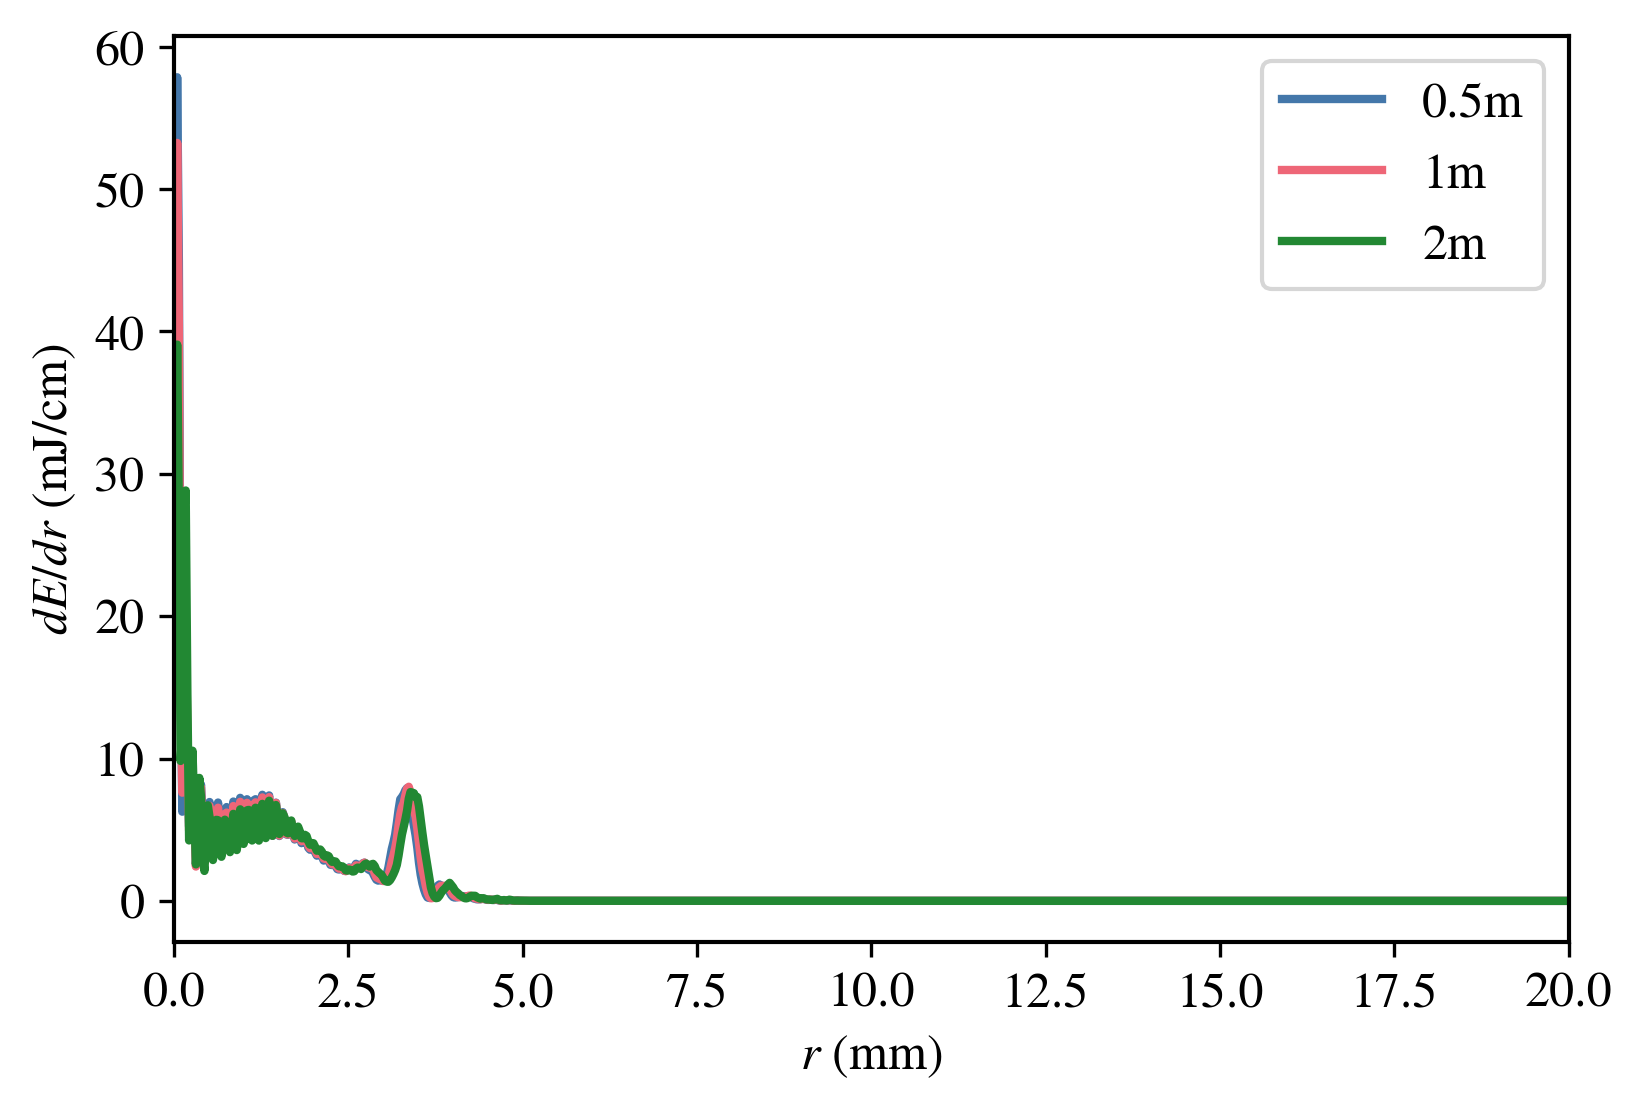

In [364]:
# Radial energy density at 1m 
I_int = np.zeros((Nz, Nx), dtype='double')
for i in range(Nz):
    I_int[i, :] = np.sum(pulse1.intensity_from_field(pulse1.load_field(i)[0]), axis=0)
I_int = pulse1.prep_data(I_int)
I_r1 = -2*np.pi*I_int[:int(pulse1.Nx/2), int(Nz*1e6/Z)]*pulse1.x[:int(pulse1.Nx/2)]*1e10*1e-15*1e3
I_r5 = -2*np.pi*I_int[:int(pulse1.Nx/2), int(Nz*0.5e6/Z)]*pulse1.x[:int(pulse1.Nx/2)]*1e10*1e-15*1e3
I_r7 = -2*np.pi*I_int[:int(pulse1.Nx/2), int(Nz*0.7e6/Z)]*pulse1.x[:int(pulse1.Nx/2)]*1e10*1e-15*1e3
I_r2 = -2*np.pi*I_int[:int(pulse1.Nx/2), int(Nz*2e6/Z)]*pulse1.x[:int(pulse1.Nx/2)]*1e10*1e-15*1e3
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(-pulse1.x[:int(pulse1.Nx/2)]/1e3, I_r5, label='0.5m')
plt.plot(-pulse1.x[:int(pulse1.Nx/2)]/1e3, I_r1, label='1m')
plt.plot(-pulse1.x[:int(pulse1.Nx/2)]/1e3, I_r2, label='2m')
plt.legend()
plt.xlim(0, 20)
plt.xlabel(r'$r$ (mm)')
plt.ylabel(r'$dE/dr$ (mJ/cm)')
plt.show()